In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score, roc_curve, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score as CVS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

#!pip install mlxtend


### 3. Load and pre-process the dataset if necessary. Explain steps that you have taken. Are there any alternative ways for doing that? Explain.

In [2]:
cusdf = pd.read_csv("Customer relationship marketing (CRM).csv")

In [3]:
cusdf.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,No,Basic,Bachelor,2/03/2011,Employed,M,43836,Rural,Single,73,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car


In [4]:
cusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      9134 non-null   object 
 1   Customer Lifetime Value    9134 non-null   float64
 2   Response                   9134 non-null   object 
 3   Coverage                   9134 non-null   object 
 4   Education                  9134 non-null   object 
 5   Effective To Date          9134 non-null   object 
 6   EmploymentStatus           9134 non-null   object 
 7   Gender                     9134 non-null   object 
 8   Income                     9134 non-null   int64  
 9   Location Code              9134 non-null   object 
 10  Marital Status             9134 non-null   object 
 11  Monthly Premium Auto       9134 non-null   int64  
 12  Months Since Last Claim    9134 non-null   int64  
 13  Number of Open Complaints  9134 non-null   int64

In [5]:
#change effective to date from object to date
cusdf['Effective To Date'] = pd.to_datetime(cusdf['Effective To Date'])
cusdf['Day'] = cusdf['Effective To Date'].dt.day
cusdf['Month'] = cusdf['Effective To Date'].dt.month

In [6]:
cusdf.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Day,Month
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,24,2
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,31,1
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,19,2
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,20,1
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,3,2


In [7]:
#Check for missing values
print(cusdf.isnull().sum())

State                        0
Customer Lifetime Value      0
Response                     0
Coverage                     0
Education                    0
Effective To Date            0
EmploymentStatus             0
Gender                       0
Income                       0
Location Code                0
Marital Status               0
Monthly Premium Auto         0
Months Since Last Claim      0
Number of Open Complaints    0
Number of Policies           0
Policy                       0
Renew Offer Type             0
Sales Channel                0
Total Claim Amount           0
Vehicle Class                0
Day                          0
Month                        0
dtype: int64


In [8]:
#first check all features for unique values
print(cusdf.apply(lambda col: col.unique()))

State                        [Washington, Arizona, Nevada, California, Oregon]
Customer Lifetime Value      [2763.519279, 6979.535903, 12887.43165, 7645.8...
Response                                                             [No, Yes]
Coverage                                            [Basic, Extended, Premium]
Education                    [Bachelor, College, Master, High School or Bel...
Effective To Date            [2011-02-24T00:00:00.000000000, 2011-01-31T00:...
EmploymentStatus             [Employed, Unemployed, Medical Leave, Disabled...
Gender                                                                  [F, M]
Income                       [56274, 0, 48767, 43836, 62902, 55350, 14072, ...
Location Code                                         [Suburban, Rural, Urban]
Marital Status                                     [Married, Single, Divorced]
Monthly Premium Auto         [69, 94, 108, 106, 73, 67, 101, 71, 93, 110, 7...
Months Since Last Claim      [32, 13, 18, 12, 14, 0,

In [9]:
numerical = cusdf.select_dtypes(include = ['int64','float64']).columns
categorical = cusdf.select_dtypes(include = ['object', 'category']).columns

array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>],
       [<AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>,
        <AxesSubplot:title={'center':'Number of Policies'}>],
       [<AxesSubplot:title={'center':'Total Claim Amount'}>,
        <AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Month'}>]], dtype=object)

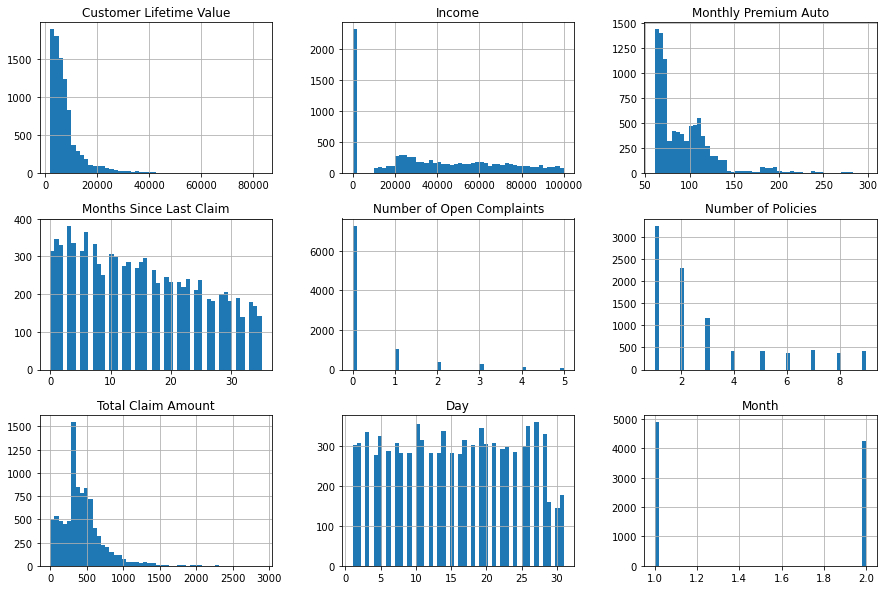

In [10]:
#visualising numerical variable distributions
cusdf[numerical].hist(bins=50, figsize=(15, 10), layout=(3, 3))

From above we can observe that CLV is heavily skewed right. The above plot also shows that we have a significant amount of observations where income is 0. The monthly premium auto is also skewed to be in the range of 50 or less. We can also observe that most of the customers months since last claim is between 0-10 months. There is also more observations with 0 open complaints and most of the observations have 1 number of policy. Total claim amount is also skewed mostly to under $500.

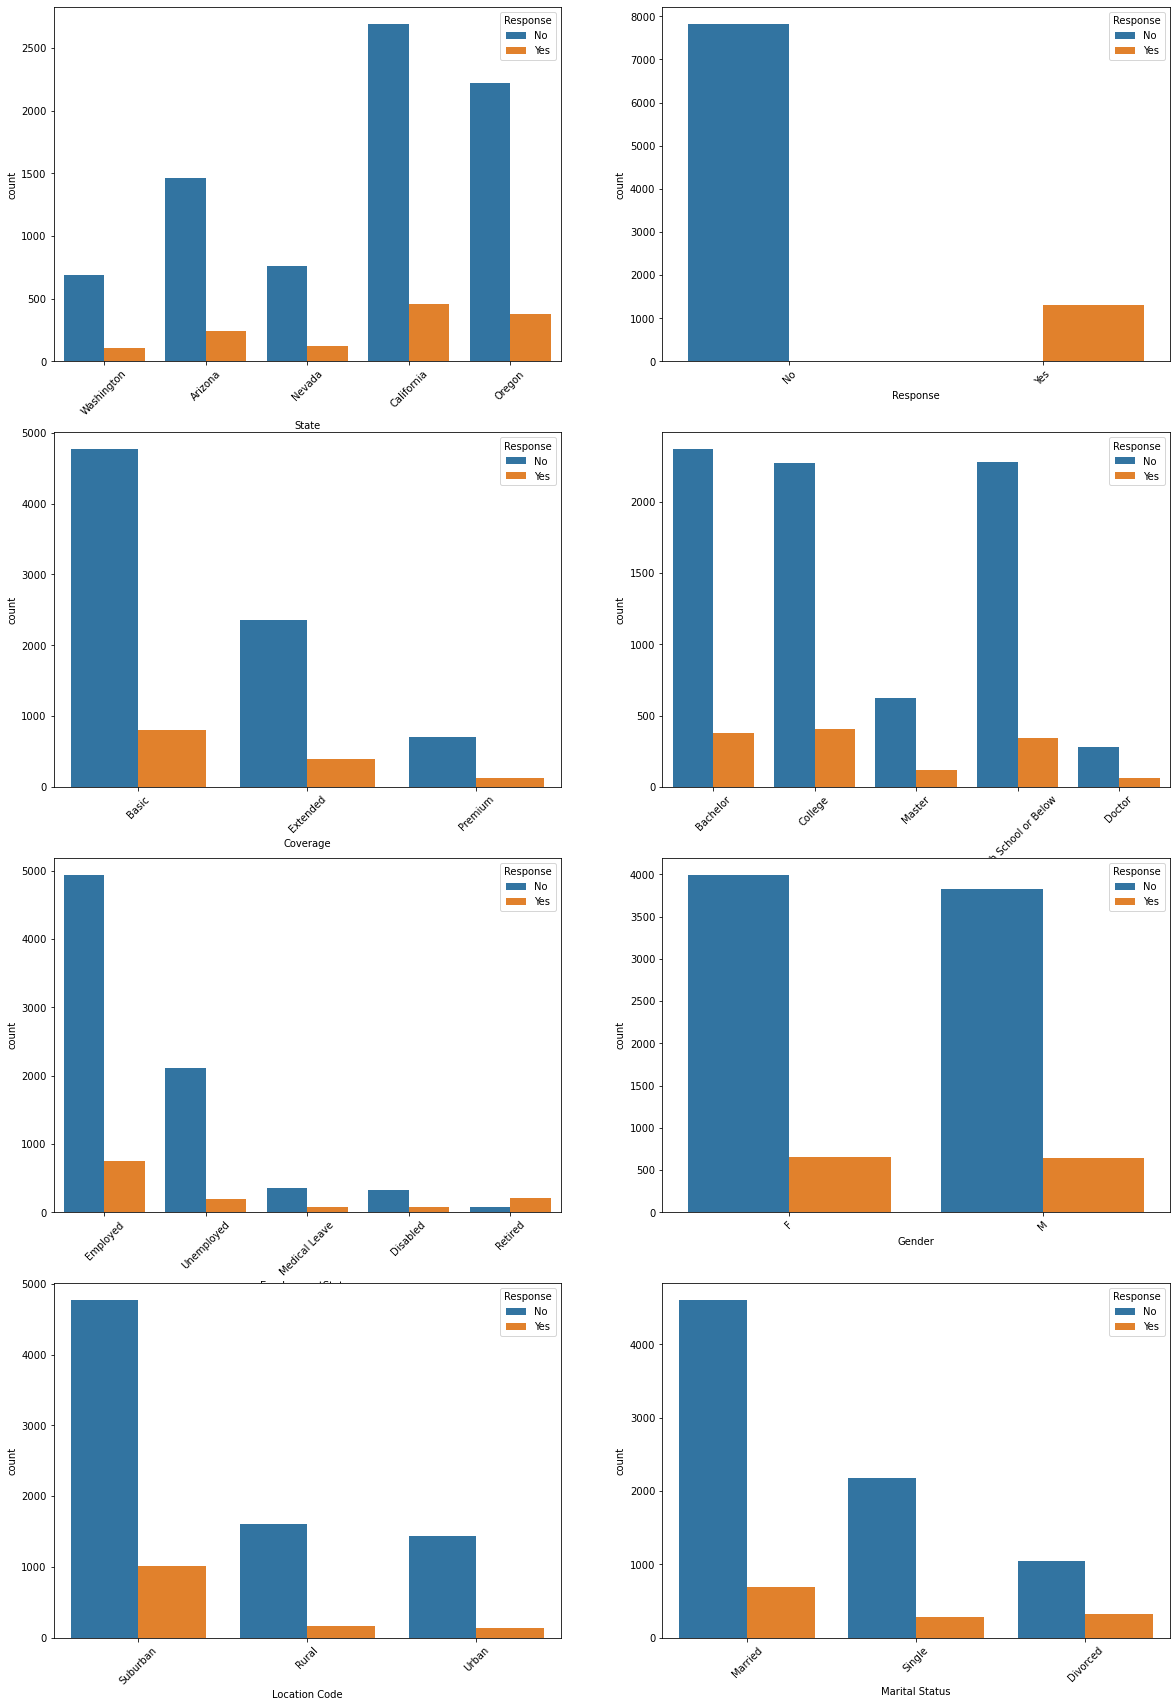

In [11]:
#visualising categorical distributions
fig, ax = plt.subplots(4, 2, figsize=(20, 30))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(cusdf[variable], ax=subplot, hue=cusdf['Response'])
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

From the above categorical countplots, we can observe some inbalance in the categorical variables- state of California has the most observations, Response which will be our target variables is heavily imbalanced as well with No being the most number of observations, we will have to apply some sampling techiques to balance this out. Most observations have got a basic premium and is mostly employed. In terms of education, there are far fewer observations for Masters and Doctors level. Most of the customers in the data set are suburban customers and are customers who is married.

In [12]:
#change target column to 0 (No) and 1(Yes)
cusdf['Response'] = cusdf['Response'].map({'Yes': 1, 'No': 0})

cusdf.head(10)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Day,Month
0,Washington,2763.519279,0,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,24,2
1,Arizona,6979.535903,0,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,31,1
2,Nevada,12887.431650,0,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,19,2
3,California,7645.861827,0,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,20,1
4,Washington,2813.692575,0,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,3,2
5,Oregon,8256.297800,1,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,...,14,0,2,Personal L3,Offer2,Web,159.383042,Two-Door Car,25,1
6,Oregon,5380.898636,1,Basic,College,2011-02-24,Employed,F,55350,Suburban,...,0,0,9,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,24,2
7,Arizona,7216.100311,0,Premium,Master,2011-01-18,Unemployed,M,0,Urban,...,0,0,4,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,18,1
8,Oregon,24127.504020,1,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,Suburban,...,13,0,2,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,26,1
9,Oregon,7388.178085,0,Extended,College,2011-02-17,Employed,F,28812,Urban,...,17,0,8,Special L2,Offer2,Branch,425.527834,Four-Door Car,17,2


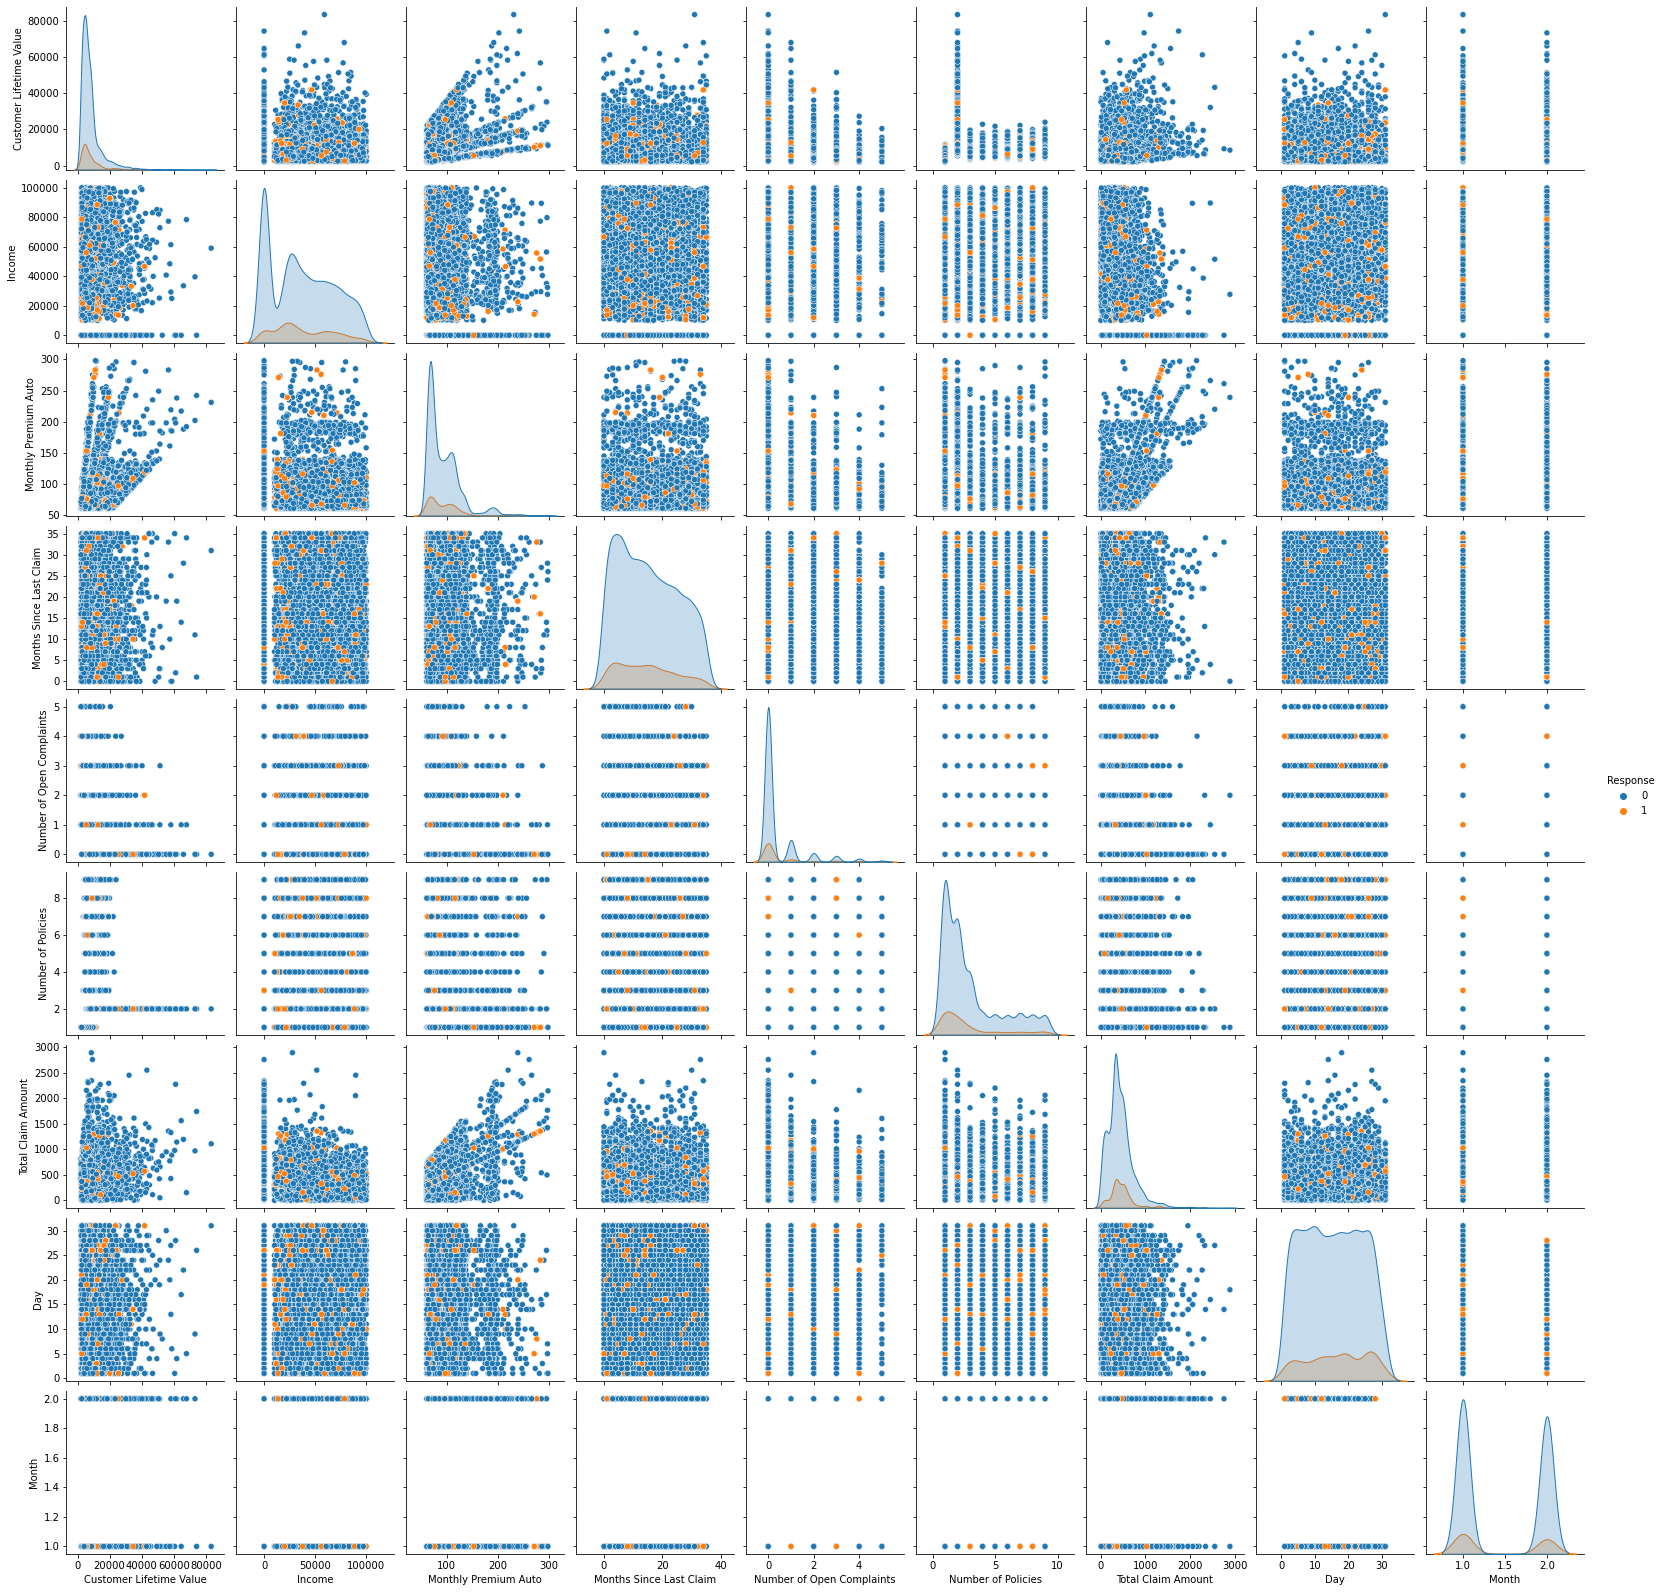

In [13]:
#analyse relationship between numerical variables
num = cusdf.select_dtypes(include = ['int64','float64']).columns
sns.pairplot(cusdf[num],diag_kind="kde", hue='Response')

In [14]:
#splitting dataset before data normalization. Dropped Effective to date as the year is all 2011, and we have a new coloumn for day and month

X=cusdf.drop(['Response', 'Effective To Date'],axis=1)
y = cusdf['Response'].copy()


#OHE categorical data:
X = pd.get_dummies(X)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_test.shape

(1827, 58)

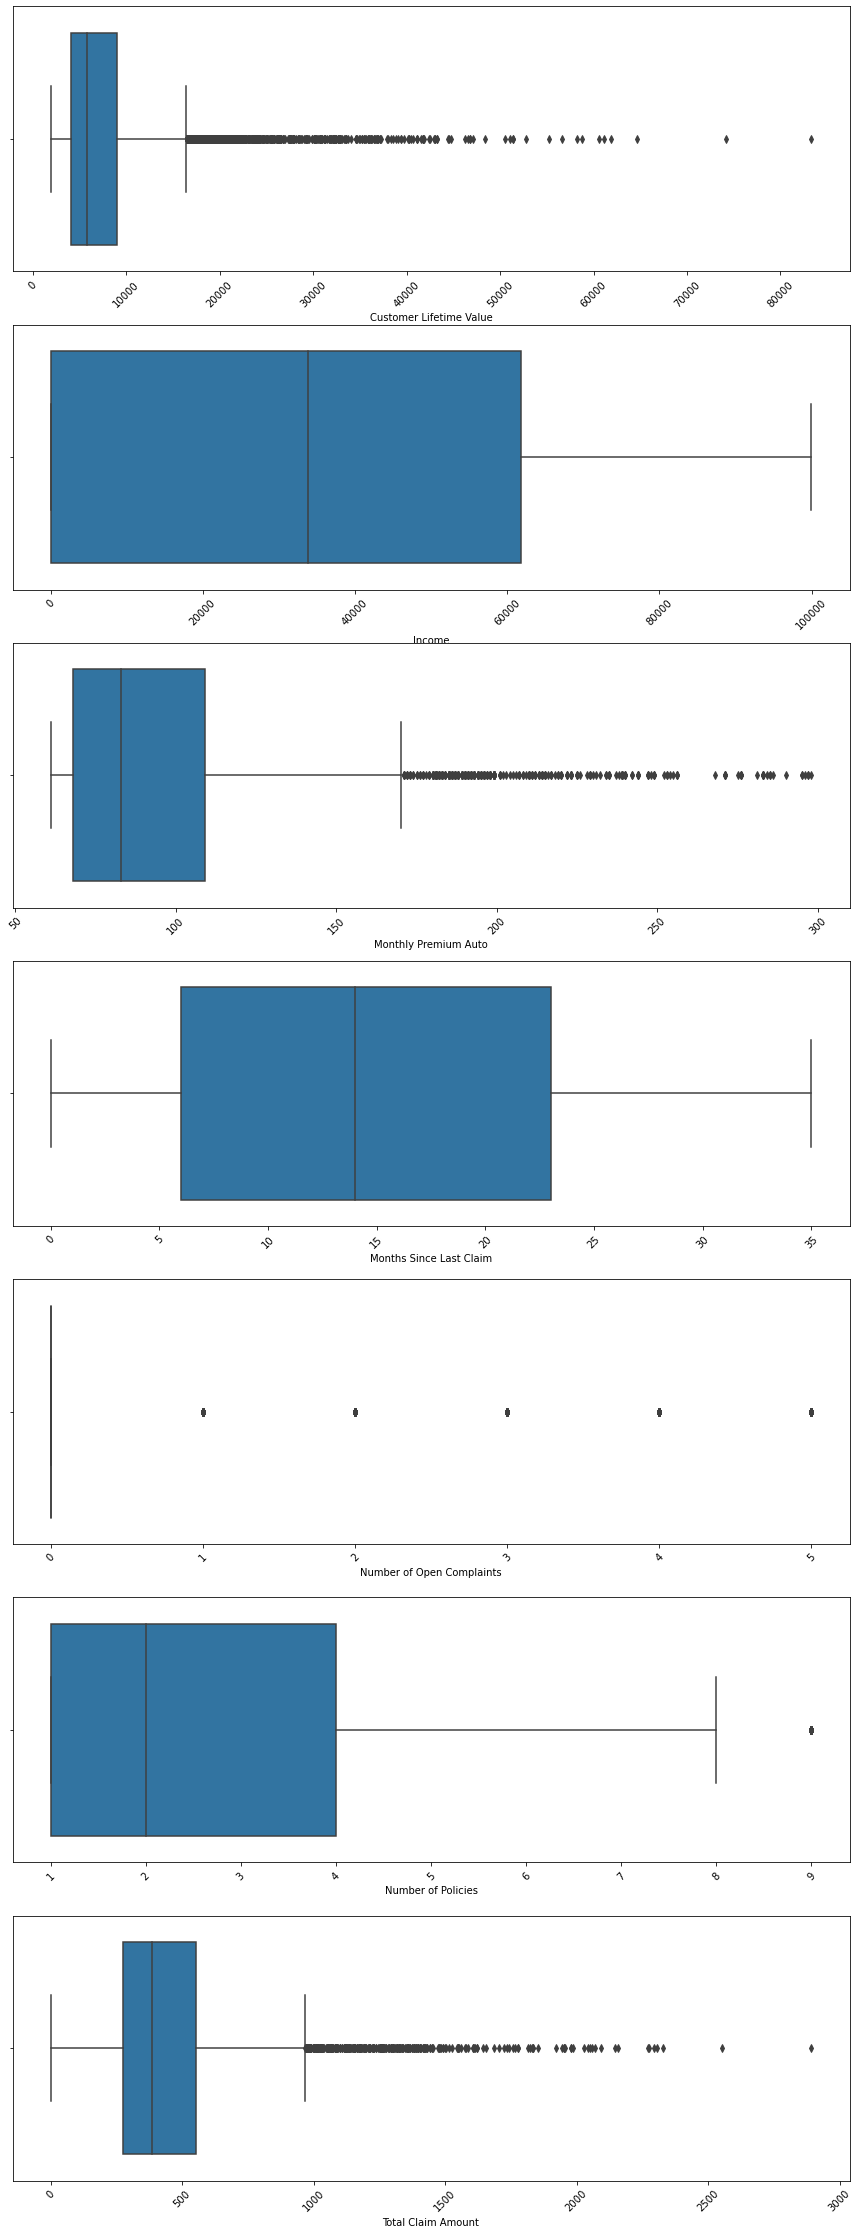

In [16]:
#Check for outliers in train data
n1 = X_train.select_dtypes(include = ['int64','float64']).columns
fig, ax = plt.subplots(7, 1, figsize=(15, 40))
for variable, subplot in zip(n1, ax.flatten()):
    sns.boxplot(X_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

As there is a problem of class imbalance and outliers in our train and test sets, we will need to use resampling method to tackle class imbalance and use Robust Scaler to deal with outliers

In [17]:

from sklearn.preprocessing import RobustScaler


In [18]:
n1 = X_train.select_dtypes(include = ['int64','float64']).columns
n2 = X_test.select_dtypes(include = ['int64','float64']).columns

RS = RobustScaler()
X_train[n1] = RS.fit_transform(X_train[n1])
X_test[n2] = RS.fit_transform(X_test[n2])




### 4. Analyse the importance of the features for predicting customer response using two different approaches. Explain the similarity/difference between outcomes.

<AxesSubplot:>

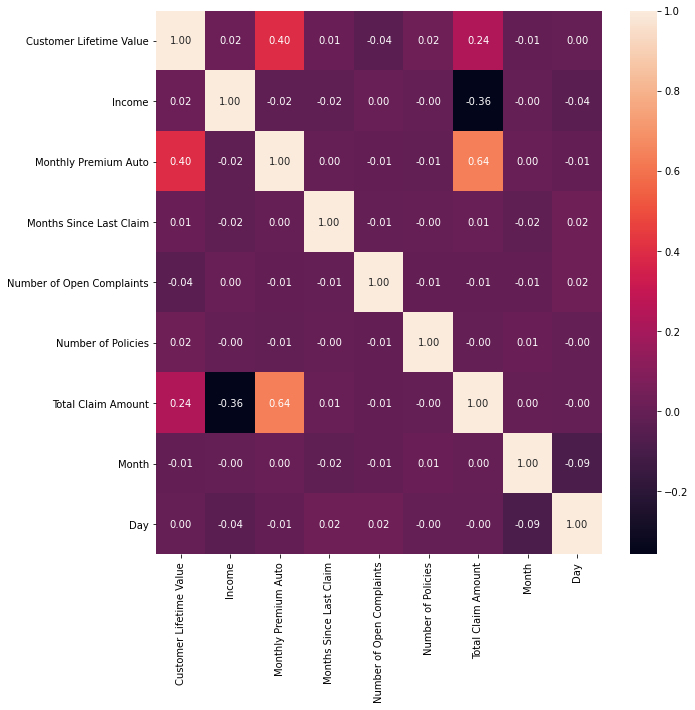

In [19]:
#check correlation on numerical variables to see if there is multicollinearity issue (>0.8)
plt.figure(figsize = (10,10))
sns.heatmap(X_train[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount','Month','Day']].corr(), annot = True, fmt = ".2f")

In [20]:
#Method 1 - using logistic regression
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression(random_state=42)
lrmodel.fit(X_train, y_train)
LRImportances = pd.DataFrame(data={'Features': X_train.columns,'Coefficient': lrmodel.coef_[0]})
LRImportances = LRImportances.sort_values(by='Coefficient')



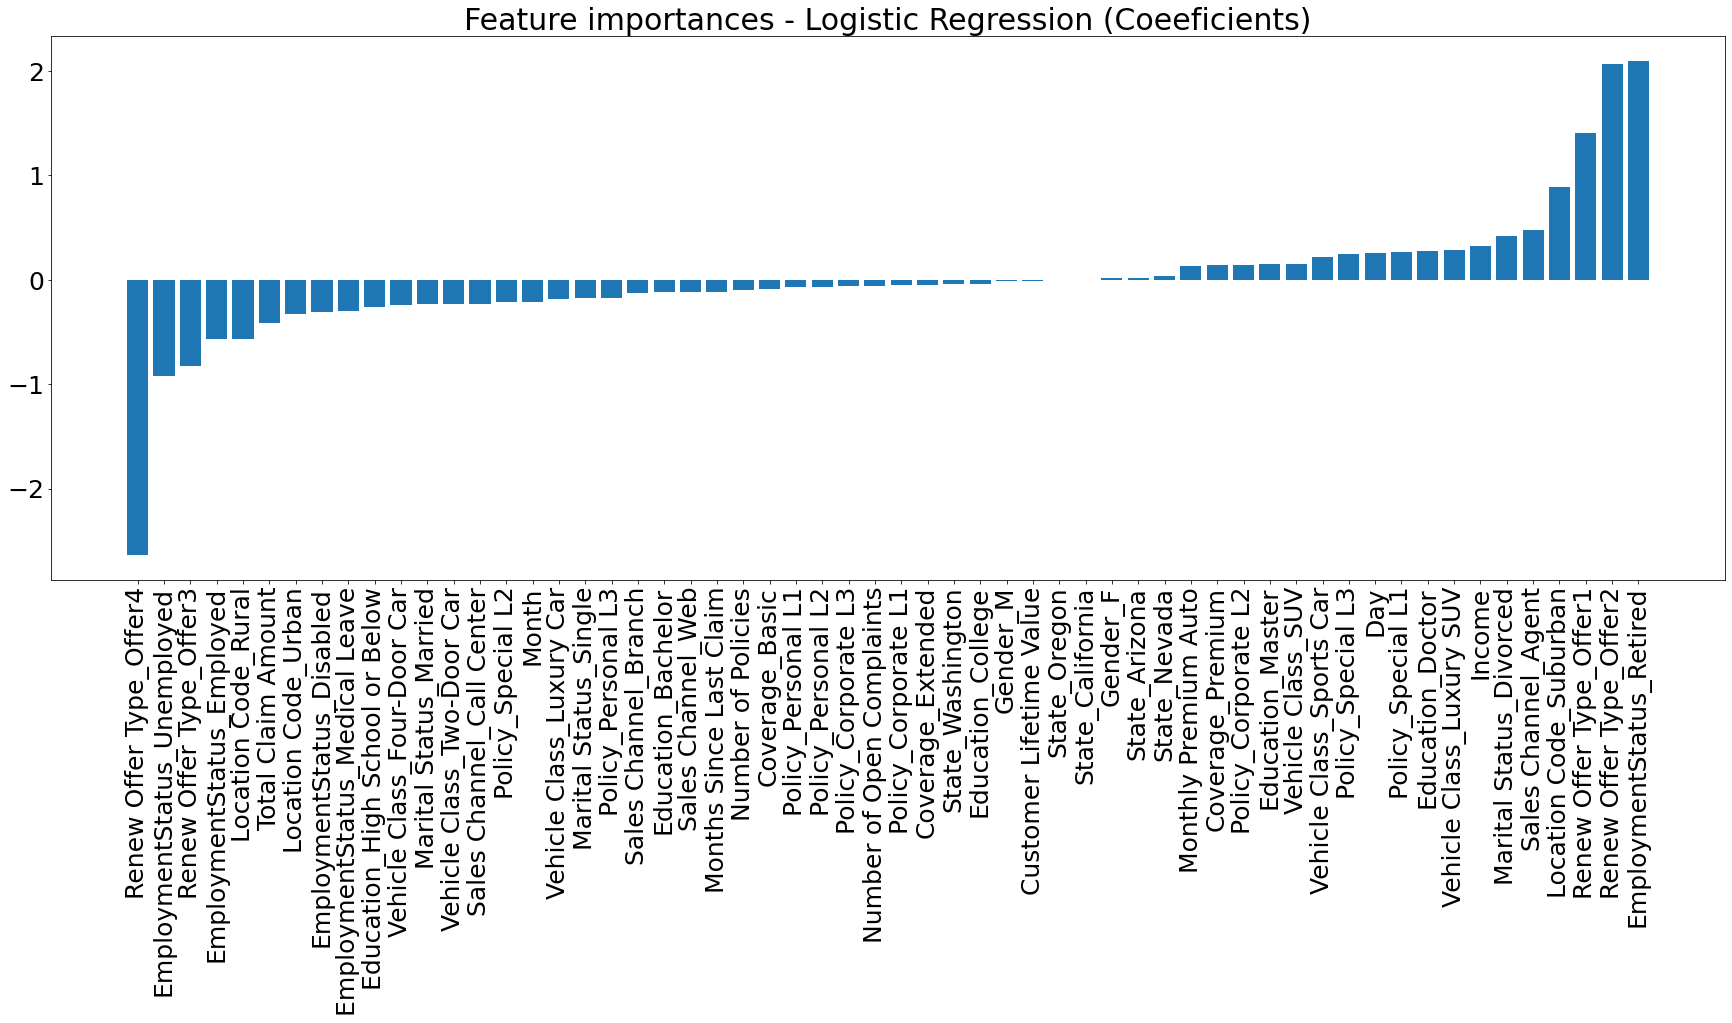

In [21]:
plt.figure(figsize = (30,10))
plt.bar(x=LRImportances['Features'], height=LRImportances['Coefficient'])
plt.title('Feature importances - Logistic Regression (Coeeficients)', size=30)
plt.xticks(rotation='vertical',fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [22]:
#Method 2 - using Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(X_train, y_train)
RFImportances = pd.DataFrame({'Features':X_train.columns,'feature_importance':rfmodel.feature_importances_})
RFImportances = RFImportances.sort_values(by='feature_importance')

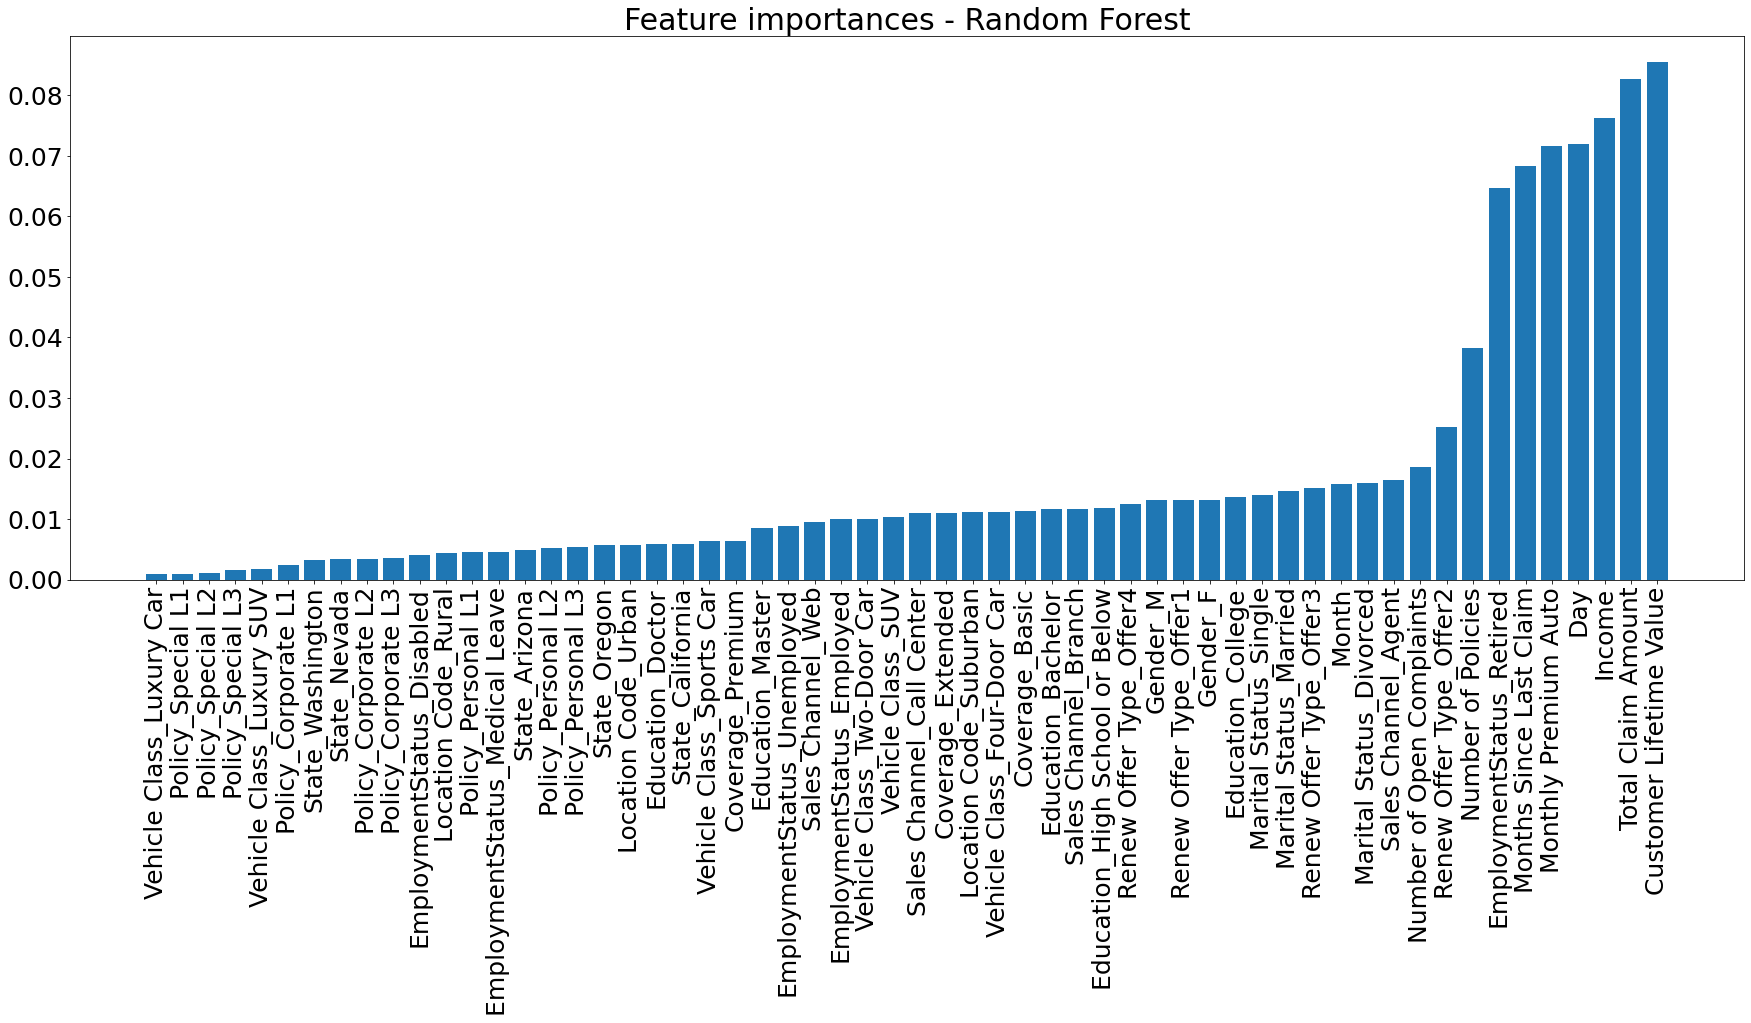

In [23]:
plt.figure(figsize = (30,10))
plt.bar(x=RFImportances['Features'], height=RFImportances['feature_importance'])
plt.title('Feature importances - Random Forest', size=30)
plt.xticks(rotation='vertical',fontsize=25)
plt.yticks(fontsize=25)
plt.show()

### 5. Create three supervised machine learning (ML) models except any ensemble approach for predicting customer response.

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics

In [25]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [26]:
from sklearn.pipeline import make_pipeline
#Function to run train and test splits on multiple models using in built in defaults - captures necessary evaluation metrics
#We will use this function as a baseline model to compare against a hyper parameter tuned one
all_models = {'SVC':SVC(random_state=42,class_weight='balanced'),
              'KNN': KNeighborsClassifier(),
              'DT': DecisionTreeClassifier(random_state = 42,class_weight='balanced'),
              'MLP': MLPClassifier(random_state = 42)}

def multiple_models(trainx,trainy,testx, testy):
    
    model_names = []
    model_accuracyscores_train = []
    model_accuracyscores_test = []
    model_roc_auc_scores_train = []
    model_roc_auc_scores_test = []
    model_recall_train = []
    model_recall_test = []
    model_f1_train = []
    model_f1_test = []
    model_precision_train = []
    model_precision_test = []
    model_MCC_train = []
    model_MCC_test = []

    
    
    
    for model_name in all_models:
        pipeline = make_pipeline(all_models[model_name])
        pipeline.fit(trainx, trainy)
        predictions_tr = pipeline.predict(trainx)
        predictions_ts = pipeline.predict(testx)
        model_names.append(model_name)
        accuracy_train = accuracy_score(trainy, predictions_tr)
        accuracy_test = accuracy_score(testy,predictions_ts)
        model_accuracyscores_train.append(accuracy_train * 100)
        model_accuracyscores_test.append(accuracy_test * 100)
        roc_auc_train = roc_auc_score(trainy, predictions_tr)
        roc_auc_test = roc_auc_score(testy, predictions_ts)
        model_roc_auc_scores_train.append(roc_auc_train*100)
        model_roc_auc_scores_test.append(roc_auc_test*100)
        recall_train = recall_score(trainy, predictions_tr)
        recall_test = recall_score(testy, predictions_ts)
        model_recall_train.append(recall_train*100)
        model_recall_test.append(recall_test*100)
        f1_train = f1_score(trainy, predictions_tr)
        f1_test = f1_score(testy, predictions_ts)
        model_f1_train.append(f1_train*100)
        model_f1_test.append(f1_test*100)
        precision_train = precision_score(trainy, predictions_tr)
        precision_test = precision_score(testy, predictions_ts)
        model_precision_train.append(precision_train*100)
        model_precision_test.append(precision_test*100)
        mcc_train = matthews_corrcoef(trainy, predictions_tr)
        mcc_test = matthews_corrcoef(testy, predictions_ts)
        model_MCC_train.append(mcc_train*100)
        model_MCC_test.append(mcc_test*100)

    

    model_eval = list(zip(model_names, model_accuracyscores_train, model_accuracyscores_test, model_roc_auc_scores_train, model_roc_auc_scores_test,
                         model_recall_train, model_recall_test, model_f1_train, model_f1_test, model_precision_train , model_precision_test,
                         model_MCC_train, model_MCC_test))
    model_eval = pd.DataFrame(model_eval, columns=["Model Type", "Accuracy - Train","Accuracy - Test",
                                                   "ROC_AUC - Train", "ROC_AUC - Test",
                                                   "Recall - Train", "Recall - Test", "F1 - Train","F1 - Test", 
                                                   "Precision - Train", "Precision - Test",
                                                  "MCC - Train", "MCC - Test"])    
    model_eval    
    
    return model_eval
        

    
    


In [27]:

Baseline = multiple_models(X_train, y_train, X_test, y_test)
Baseline

,Model Type,Accuracy - Train,Accuracy - Test,ROC_AUC - Train,ROC_AUC - Test,Recall - Train,Recall - Test,F1 - Train,F1 - Test,Precision - Train,Precision - Test,MCC - Train,MCC - Test
0,SVC,90.420145,87.192118,93.973366,90.633535,98.944338,95.488722,74.656046,68.463612,59.941860,53.361345,72.487070,65.301885
1,KNN,96.564938,94.854953,97.676777,95.117839,99.232246,95.488722,89.176369,84.385382,80.971026,75.595238,87.796495,82.150857
2,DT,100.000000,92.391899,100.000000,81.201322,100.000000,65.413534,100.000000,71.457906,100.000000,78.733032,100.000000,67.495738
3,MLP,100.000000,96.113848,100.000000,94.451094,100.000000,92.105263,100.000000,87.344029,100.000000,83.050847,100.000000,85.214663


               Original Dataset Baseline Model Performance     


[Text(0.5, 1.0, 'MCC % - Train & Test')]

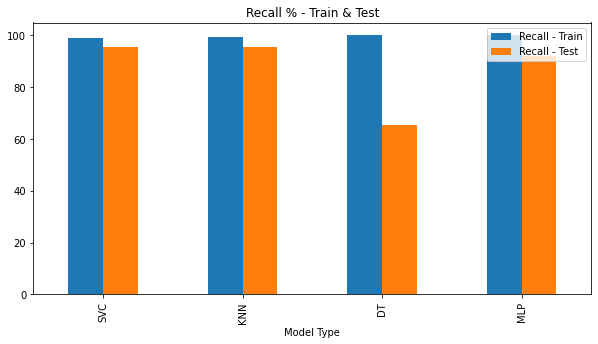

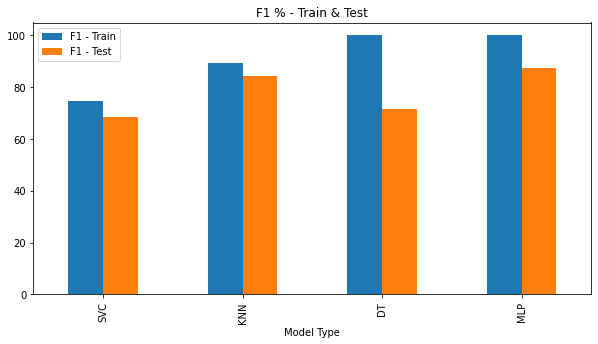

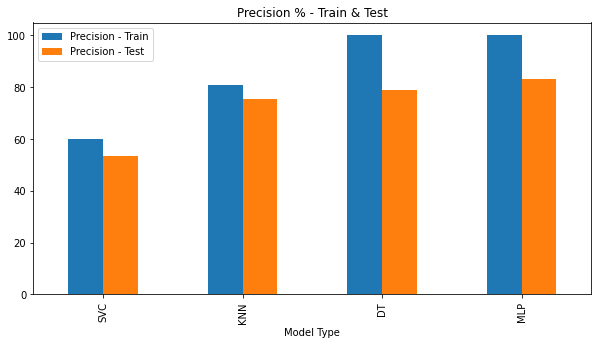

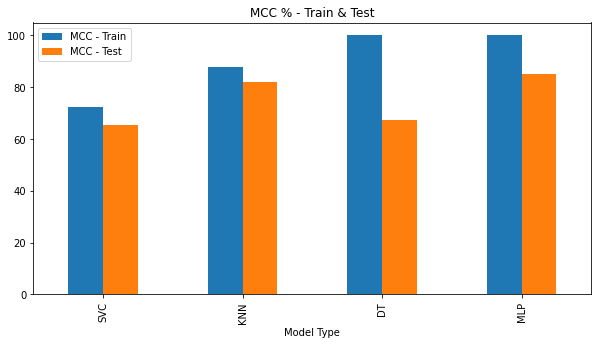

In [28]:
#Visualising Baseline Results - We will look at Recall, F1, Precision and Matthews Coeeficient. Accuracy and ROC_AUC can be misleading in cases of imbalanced datasets

print("               Original Dataset Baseline Model Performance     ")

Baseline.plot(x="Model Type", y=["Recall - Train", "Recall - Test"], kind="bar", figsize=(10,5)).set(title="Recall % - Train & Test")
Baseline.plot(x="Model Type", y=["F1 - Train", "F1 - Test"], kind="bar", figsize=(10,5)).set(title="F1 % - Train & Test")
Baseline.plot(x="Model Type", y=["Precision - Train", "Precision - Test"], kind="bar", figsize=(10,5)).set(title="Precision % - Train & Test")
Baseline.plot(x="Model Type", y=["MCC - Train", "MCC - Test"], kind="bar", figsize=(10,5)).set(title="MCC % - Train & Test")

In [29]:
#Now that we have our base model - let's do grid search to find the best parameter:

from sklearn.model_selection import GridSearchCV


In [30]:
model_params = {'SVC': {'model': SVC(), 'params':{'C': [1,5,7,10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'linear']}},
               'DT': {'model': DecisionTreeClassifier(), 'params':{'criterion': ['entropy', 'gini'], 'max_depth':[8,10,12],'max_features': ['auto', 'sqrt'], 'min_samples_leaf':[15, 30, 45],'min_samples_split':[8,16,32]}},
               'KNN': {'model':KNeighborsClassifier(), 'params':{'n_neighbors' : [3,5,10],'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan'], 'p': [1,2],'leaf_size': [5,10,15]}},
               'MLP': {'model': MLPClassifier(), 'params':{'solver': ['lbfgs', 'adam'], 'hidden_layer_sizes':[(100,), (200,), (500,)],'learning_rate': ['constant','adaptive'], 'activation': ['logistic', 'tanh', 'relu']}}}

In [31]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], n_jobs=-1, cv=3, verbose=5, scoring="f1_micro",)
    clf.fit(X_train, y_train)
    scores.append({'model': model_name,'best_score': clf.best_score_,'best_params': clf.best_params_})

    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


,model,best_score,best_params
0,SVC,0.956754,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
1,DT,0.871493,"{'criterion': 'gini', 'max_depth': 8, 'max_fea..."
2,KNN,0.934446,"{'leaf_size': 5, 'metric': 'minkowski', 'n_nei..."
3,MLP,0.947721,"{'activation': 'tanh', 'hidden_layer_sizes': (..."


In [32]:
all_models = {'SVC_GS':SVC(C = 10, gamma = 0.1, kernel = 'rbf', random_state=42,class_weight='balanced'),
              'KNN_GS': KNeighborsClassifier(leaf_size = 5, metric = 'minkowski', n_neighbors = 10, p = 1, weights = 'distance'),
              'DT_GS': DecisionTreeClassifier(criterion = 'gini', max_depth=12, max_features = 'sqrt', min_samples_leaf = 15, random_state=42, min_samples_split=8),
              'MLP_GS': MLPClassifier(activation = 'tanh', hidden_layer_sizes = (200,), learning_rate = 'adaptive', random_state=42, solver='adam')}

GS_models = multiple_models(X_train, y_train, X_test, y_test)
GS_models

,Model Type,Accuracy - Train,Accuracy - Test,ROC_AUC - Train,ROC_AUC - Test,Recall - Train,Recall - Test,F1 - Train,F1 - Test,Precision - Train,Precision - Test,MCC - Train,MCC - Test
0,SVC_GS,99.958943,97.865353,99.976057,97.503287,100.000000,96.992481,99.856253,92.972973,99.712919,89.273356,99.832445,91.826671
1,KNN_GS,100.000000,96.004379,100.000000,94.387033,100.000000,92.105263,100.000000,87.033748,100.000000,82.491582,100.000000,84.860276
2,DT_GS,88.805255,86.261631,69.349377,63.891230,42.130518,32.330827,51.768868,40.661939,67.125382,54.777070,47.401682,34.962696
3,MLP_GS,100.000000,97.318008,100.000000,98.118615,100.000000,99.248120,100.000000,91.507799,100.000000,84.887460,100.000000,90.314106


In [33]:
print("SVM Best Parameters")
df.iloc[0,2]

SVM Best Parameters


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Training Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6265
           1       1.00      1.00      1.00      1042

    accuracy                           1.00      7307
   macro avg       1.00      1.00      1.00      7307
weighted avg       1.00      1.00      1.00      7307

Testing Results
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1537
           1       0.96      0.88      0.92       290

    accuracy                           0.97      1827
   macro avg       0.97      0.94      0.95      1827
weighted avg       0.97      0.97      0.97      1827



(None,
 None)

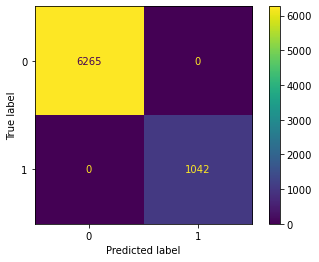

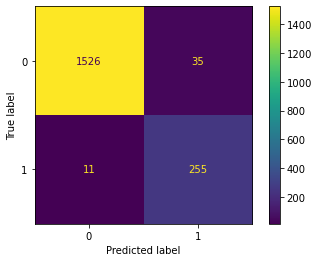

In [34]:
#SVM Model Using Optimum Hyperparameter;

model = SVC(random_state=42, C = 10, gamma = 0.1, kernel = 'rbf')

#create function to run final models
def model_train(trainx,trainy,testx, testy):
    modelfit = model.fit(trainx, trainy)
    predtr = modelfit.predict(trainx)
    predts = modelfit.predict(testx)
    a = plot_confusion_matrix(model, trainx, trainy)
    return print("Training Results"),a,print(classification_report(predtr, trainy))

def model_test(trainx,trainy,testx, testy):
    modelfit = model.fit(trainx, trainy)
    predtr = modelfit.predict(trainx)
    predts = modelfit.predict(testx)
    a = plot_confusion_matrix(model, testx, testy)
    return print("Testing Results"),a,print(classification_report(predts, testy))

model_train(X_train, y_train, X_test, y_test)  

model_test(X_train, y_train, X_test, y_test)  

In [35]:
print("DT Best Parameters")
df.iloc[1,2]

DT Best Parameters


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 32}

Training Results
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6653
           1       0.42      0.67      0.52       654

    accuracy                           0.89      7307
   macro avg       0.69      0.79      0.73      7307
weighted avg       0.92      0.89      0.90      7307

Testing Results
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1670
           1       0.32      0.55      0.41       157

    accuracy                           0.86      1827
   macro avg       0.64      0.72      0.66      1827
weighted avg       0.90      0.86      0.88      1827



(None,
 None)

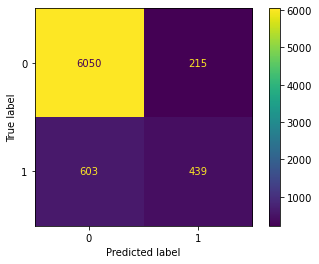

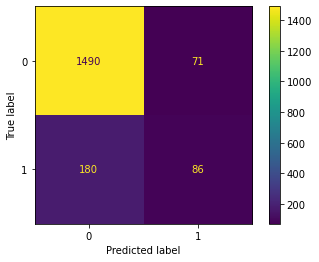

In [36]:
#Decision Tree Final Model
model = DecisionTreeClassifier(criterion = 'gini', max_depth=12, max_features = 'sqrt', min_samples_leaf = 15, random_state=42, min_samples_split=8)
model_train(X_train, y_train, X_test, y_test)  

model_test(X_train, y_train, X_test, y_test)  

In [37]:
print("KNN Best Parameters")
df.iloc[2,2]

KNN Best Parameters


{'leaf_size': 5,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

Training Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6265
           1       1.00      1.00      1.00      1042

    accuracy                           1.00      7307
   macro avg       1.00      1.00      1.00      7307
weighted avg       1.00      1.00      1.00      7307

Testing Results
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1530
           1       0.92      0.82      0.87       297

    accuracy                           0.96      1827
   macro avg       0.94      0.91      0.92      1827
weighted avg       0.96      0.96      0.96      1827



(None,
 None)

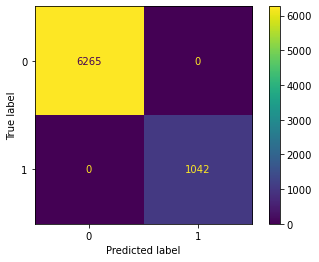

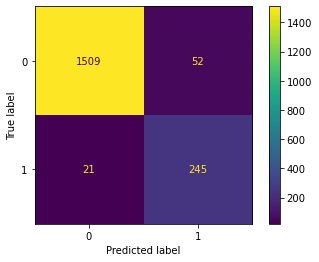

In [38]:
#KNN Final Model
model = KNeighborsClassifier(metric ='minkowski',n_neighbors = 10, p=1, weights = 'distance', leaf_size = 5 )

model_train(X_train, y_train, X_test, y_test)  

model_test(X_train, y_train, X_test, y_test)  

In [39]:
print("MLP Best Parameters")

df.iloc[3,2]


MLP Best Parameters


{'activation': 'tanh',
 'hidden_layer_sizes': (200,),
 'learning_rate': 'constant',
 'solver': 'adam'}

Training Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6265
           1       1.00      1.00      1.00      1042

    accuracy                           1.00      7307
   macro avg       1.00      1.00      1.00      7307
weighted avg       1.00      1.00      1.00      7307

Testing Results
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1516
           1       0.99      0.85      0.92       311

    accuracy                           0.97      1827
   macro avg       0.98      0.92      0.95      1827
weighted avg       0.97      0.97      0.97      1827



(None,
 None)

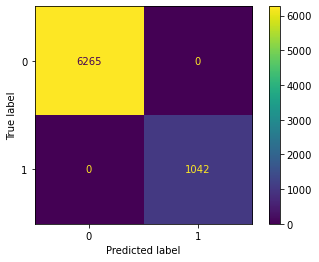

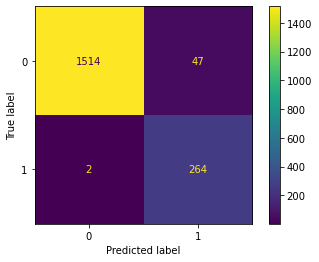

In [40]:
model = MLPClassifier(activation = 'tanh', hidden_layer_sizes = (200,), learning_rate = 'adaptive', random_state=42, solver='adam')

model_train(X_train, y_train, X_test, y_test)  

model_test(X_train, y_train, X_test, y_test)  

In [41]:
Evaluation_df = [Baseline,GS_models]
Evaluation_df = pd.concat(Evaluation_df)
Evaluation_df = Evaluation_df.round(2)
Evaluation_df

,Model Type,Accuracy - Train,Accuracy - Test,ROC_AUC - Train,ROC_AUC - Test,Recall - Train,Recall - Test,F1 - Train,F1 - Test,Precision - Train,Precision - Test,MCC - Train,MCC - Test
0,SVC,90.42,87.19,93.97,90.63,98.94,95.49,74.66,68.46,59.94,53.36,72.49,65.30
1,KNN,96.56,94.85,97.68,95.12,99.23,95.49,89.18,84.39,80.97,75.60,87.80,82.15
2,DT,100.00,92.39,100.00,81.20,100.00,65.41,100.00,71.46,100.00,78.73,100.00,67.50
3,MLP,100.00,96.11,100.00,94.45,100.00,92.11,100.00,87.34,100.00,83.05,100.00,85.21
0,SVC_GS,99.96,97.87,99.98,97.50,100.00,96.99,99.86,92.97,99.71,89.27,99.83,91.83
1,KNN_GS,100.00,96.00,100.00,94.39,100.00,92.11,100.00,87.03,100.00,82.49,100.00,84.86
2,DT_GS,88.81,86.26,69.35,63.89,42.13,32.33,51.77,40.66,67.13,54.78,47.40,34.96
3,MLP_GS,100.00,97.32,100.00,98.12,100.00,99.25,100.00,91.51,100.00,84.89,100.00,90.31


               Original Dataset Baseline Model  & Grid SearchPerformance     


[Text(0.5, 1.0, 'MCC % - Train & Test')]

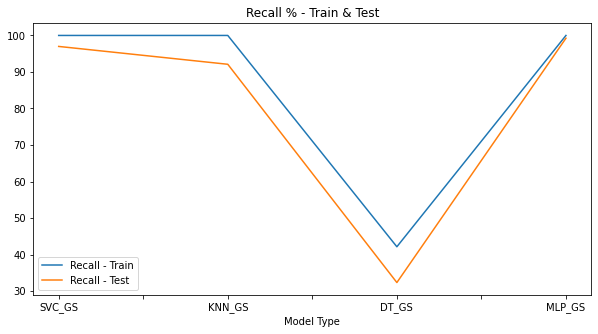

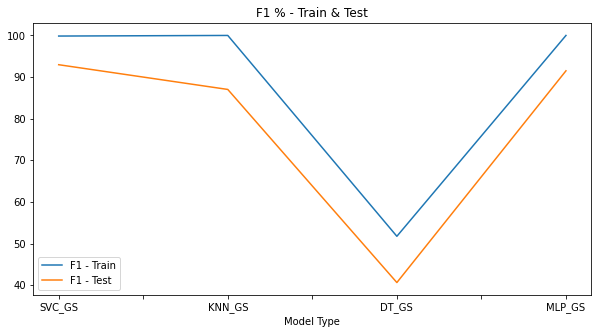

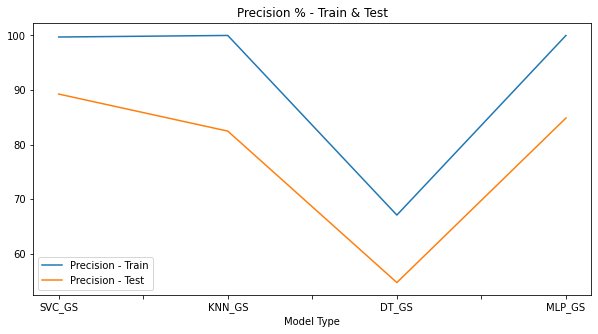

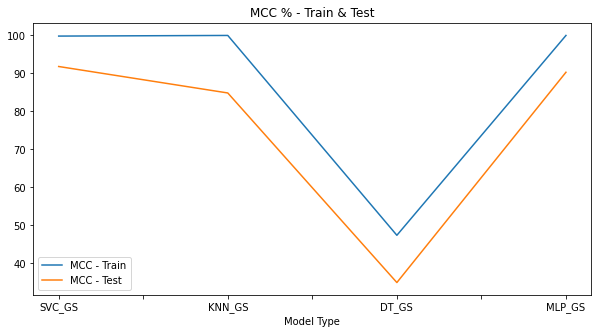

In [42]:
print("               Original Dataset Baseline Model  & Grid SearchPerformance     ")

GS_models.plot(x="Model Type", y=["Recall - Train", "Recall - Test"], kind="line", figsize=(10,5)).set(title="Recall % - Train & Test")
GS_models.plot(x="Model Type", y=["F1 - Train", "F1 - Test"], kind="line", figsize=(10,5)).set(title="F1 % - Train & Test")
GS_models.plot(x="Model Type", y=["Precision - Train", "Precision - Test"], kind="line", figsize=(10,5)).set(title="Precision % - Train & Test")
GS_models.plot(x="Model Type", y=["MCC - Train", "MCC - Test"], kind="line", figsize=(10,5)).set(title="MCC % - Train & Test")

## 6. Build three ensemble models for predicting customer response. (6 Marks)

### a. When do you want to use ensemble models over other ML models?

### b. What are the similarities or differences between these models?

### c. Is there any preferable scenario for using any specific model among set of ensemble models?

### d. Write a report comparing performances of models built in question 5 and 6. Report the best method based on model complexity and performance.



In [43]:
#Ensemble model 1
#Decision Tree ontop of BaggingClassifier as we are checking if we can improve the performance of the model in question 5 above

from sklearn.ensemble import BaggingClassifier as BC

In [44]:
#commpare bagging to baseline model:

knn_clf = KNeighborsClassifier()
svc_clf = SVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

mod_names = ["KNN", "SVC", "MLP", "DT"]
classifier_names = [knn_clf, svc_clf, mlp_clf, dt_clf]
labels = [clf.__class__.__name__ for clf in classifier_names]
normal_accuracy = []

bagging_accuracy = []

for clf in classifier_names:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    bagging_clf = BC(clf, n_estimators = 100, random_state=42)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1,scoring="f1_micro")
    
    normal_accuracy.append(np.round(cv_scores.mean(),4))
    
    
    bagging_accuracy.append(np.round(bagging_scores.mean(),4))
    

In [45]:
bagging_accuracy

bag_eval = list(zip(mod_names,normal_accuracy,bagging_accuracy))

bag_eval = pd.DataFrame(bag_eval, columns = ["Model Type", "Base CV F1", "Bagging CV F1"])
                
bag_eval  

,Model Type,Base CV F1,Bagging CV F1
0,KNN,0.8861,0.8974
1,SVC,0.8568,0.8568
2,MLP,0.7517,0.8592
3,DT,0.9594,0.9926


[Text(0.5, 1.0, 'F1 % - Base & Bagging')]

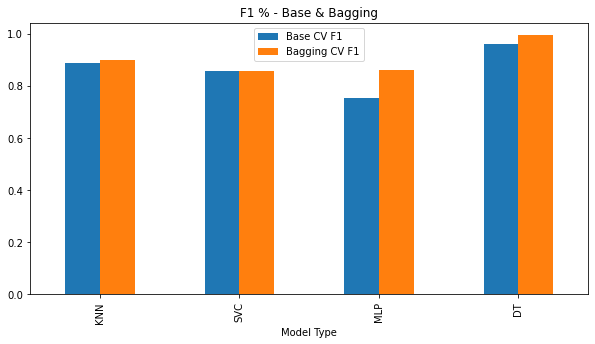

In [46]:
bag_eval.plot(x="Model Type", y=["Base CV F1", "Bagging CV F1"], kind="bar", figsize=(10,5)).set(title="F1 % - Base & Bagging")

From the above, we can observe that bagging accuracy outperformed for the MLP and DT models, the accuracy decreased for KNN and is the same for SVM. As Decision Tree was our worst performing model after hyperparameter tuning, let's apply bagging classifier to the decision tree model and see if we can get a better performance, which we will evaluate at the end of this project.

Decision Tree Cross Validation: 0.9576311165486026
Bagging Decision Tree Cross Validation: 0.9877380970362074
Bagging Confusion Matrix - Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6265
           1       1.00      1.00      1.00      1042

    accuracy                           1.00      7307
   macro avg       1.00      1.00      1.00      7307
weighted avg       1.00      1.00      1.00      7307



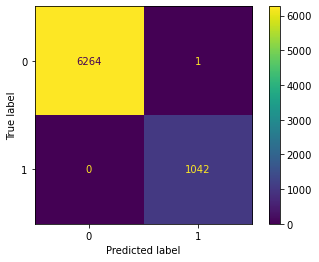

In [47]:
#Run Decision Tree with defaults first
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('Decision Tree Cross Validation:', CVS(clf, X, y, cv =3,scoring="f1_micro").mean()) 

#Next Run DT on Bagging Classifier using defaults
bagging = BC(clf, random_state = 42)
bagging.fit(X_train, y_train)
pred_tr_DT_Bag = bagging.predict(X_train)
pred_ts_DT_Bag = bagging.predict(X_test)
print('Bagging Decision Tree Cross Validation:', CVS(bagging, X, y, cv =3,scoring="f1_micro").mean()) 

#Print and evaluate DT + bagging model results
print("Bagging Confusion Matrix - Training")
plot_confusion_matrix(bagging, X_train, y_train)
print(classification_report(y_train, pred_tr_DT_Bag))


Bagging Confusion Matrix - Testing
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1561
           1       0.94      0.80      0.86       266

    accuracy                           0.96      1827
   macro avg       0.95      0.89      0.92      1827
weighted avg       0.96      0.96      0.96      1827



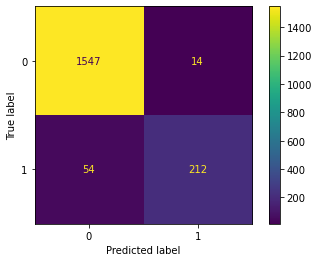

In [48]:
print("Bagging Confusion Matrix - Testing")
plot_confusion_matrix(bagging,X_test, y_test)
print(classification_report(y_test, pred_ts_DT_Bag))


Using bagging method and Decision Tree, we have been able to improve the performance of the model compared to the tuned Decision Tree model in question 5. We will do a K Fold below to find the optimum parameter for the bagging method.

In [49]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [50]:
#finding optimal number of trees
res = {}
for i in [10, 25, 50, 100, 200, 300,400,500]:
    model = BC(n_estimators=i)

    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)
    res[f'{i}'] = cross_val_score(model, X, y, scoring="f1_micro", cv=cv, n_jobs=-1)

In [51]:
res

{'10': array([0.98555008, 0.99277504, 0.9848883 , 0.98555008, 0.98325123,
        0.98620237]),
 '25': array([0.98883415, 0.99047619, 0.98948752, 0.98981938, 0.98390805,
        0.99408673]),
 '50': array([0.99244663, 0.99277504, 0.99047306, 0.98949097, 0.98686371,
        0.99310118]),
 '100': array([0.9908046 , 0.99146141, 0.99178712, 0.99047619, 0.99014778,
        0.99408673]),
 '200': array([0.991133  , 0.99178982, 0.98981603, 0.98981938, 0.98850575,
        0.99375821]),
 '300': array([0.9908046 , 0.99211823, 0.99178712, 0.9908046 , 0.98949097,
        0.99540079]),
 '400': array([0.99178982, 0.991133  , 0.99080158, 0.99047619, 0.98850575,
        0.99507227]),
 '500': array([0.99146141, 0.99244663, 0.99047306, 0.9908046 , 0.98916256,
        0.99474376])}

Text(0.5, 1.0, 'Optimum number of Estimators (Trees)')

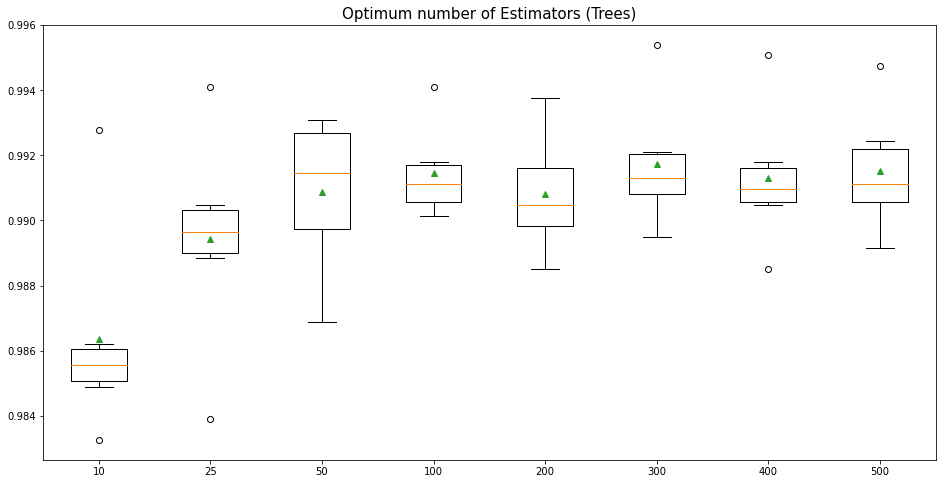

In [52]:
plt.figure(1, figsize=(16, 8))
ax = plt.boxplot(res.values(), labels=res.keys(), showmeans=True)
plt.title('Optimum number of Estimators (Trees)', size=15)

We can see that the highest average is around 50 number of estimators. So we will use this and then do a cross fold validation to find the optimum number of samples to draw.

In [53]:
sam = {}
for i in [.1, .25, .5, .75, 1.]:
    model = BC(n_estimators=50, max_samples=i)

    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=0)
    sam[f'{i*100}%'] = cross_val_score(model, X, y, scoring="f1_micro", cv=cv, n_jobs=-1)

In [54]:
sam

{'10.0%': array([0.88571429, 0.87914614, 0.87680683, 0.88702791, 0.88440066,
        0.8738502 ]),
 '25.0%': array([0.94482759, 0.94055829, 0.94678055, 0.94745484, 0.94449918,
        0.93856767]),
 '50.0%': array([0.98981938, 0.98423645, 0.98324573, 0.98489327, 0.98489327,
        0.98291721]),
 '75.0%': array([0.99310345, 0.98719212, 0.99080158, 0.98719212, 0.99277504,
        0.98620237]),
 '100.0%': array([0.99244663, 0.99146141, 0.99145861, 0.98981938, 0.99507389,
        0.98981603])}

Text(0.5, 1.0, 'Optimum number of samples to draw')

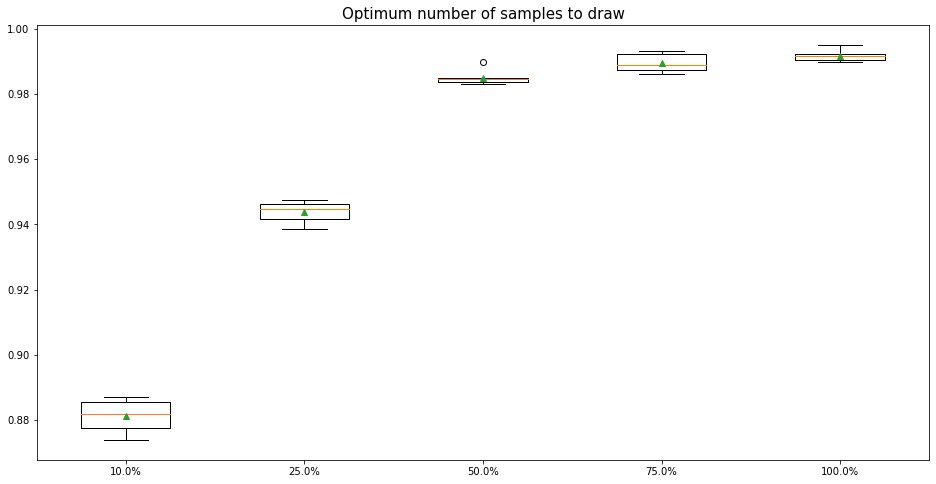

In [55]:
plt.figure(1, figsize=(16, 8))
ax = plt.boxplot(sam.values(), labels=sam.keys(), showmeans=True)
plt.title('Optimum number of samples to draw', size=15)

Ok, looks like 75% is the optimum number of samples to draw. We will use this in the final Bagging model. We will run our next ensemble first and optimise before running both these final models together.

Second Ensemble Method will be using Adaboost with the Decision Tree to see if we can improve the performance further.

Adaboost Decision Tree Cross Validation: 0.9570839869471435
Adaboost Confusion Matrix - Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6265
           1       1.00      1.00      1.00      1042

    accuracy                           1.00      7307
   macro avg       1.00      1.00      1.00      7307
weighted avg       1.00      1.00      1.00      7307



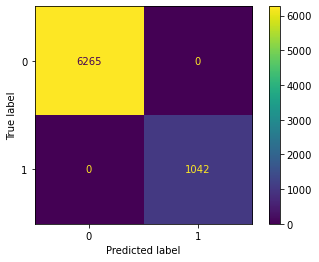

In [56]:
#Ensemble model 2 Adaboost using Decision Trees and default parameters
abc =AdaBoostClassifier(clf, random_state=42)
abc.fit(X_train, y_train)
pred_tr_DT_Ada = abc.predict(X_train)
pred_ts_DT_Ada = abc.predict(X_test)
print('Adaboost Decision Tree Cross Validation:', CVS(abc, X, y, cv =3,scoring="f1_micro").mean()) 

#Print and evaluate DT + Adaboost model results
print("Adaboost Confusion Matrix - Training")
plot_confusion_matrix(abc, X_train, y_train)
print(classification_report(y_train, pred_tr_DT_Ada))

Adaboost Confusion Matrix - Testing
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1561
           1       0.76      0.71      0.73       266

    accuracy                           0.92      1827
   macro avg       0.85      0.83      0.84      1827
weighted avg       0.92      0.92      0.92      1827



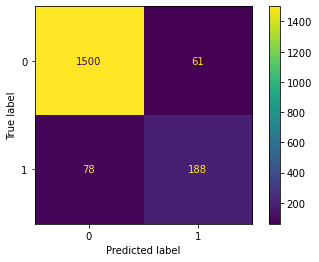

In [57]:
print("Adaboost Confusion Matrix - Testing")
plot_confusion_matrix(abc, X_test, y_test)
print(classification_report(y_test, pred_ts_DT_Ada))

We can see that the recall for our 1 class for the adaboostclassifier is not as good as the base bagging classifier. We will now tune this model and see if we can improve it further.

In [58]:
res = {}
for i in [200,500,1000,1500,2000]:
    model = AdaBoostClassifier(n_estimators=i)

    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)
    res[f'{i}'] = cross_val_score(model, X, y, scoring="f1_micro", cv=cv, n_jobs=-1)

In [59]:
res

{'200': array([0.87586207, 0.87422003, 0.87450723, 0.88013136, 0.87881773,
        0.87187911]),
 '500': array([0.88341544, 0.87454844, 0.88304862, 0.8863711 , 0.88045977,
        0.88009198]),
 '1000': array([0.89293924, 0.88899836, 0.89257556, 0.89392447, 0.88932677,
        0.8912615 ]),
 '1500': array([0.89688013, 0.89819376, 0.89980289, 0.90377668, 0.89688013,
        0.89816032]),
 '2000': array([0.90213465, 0.9047619 , 0.90637319, 0.91231527, 0.90706076,
        0.90275953])}

Text(0.5, 1.0, 'Optimum number of estimators')

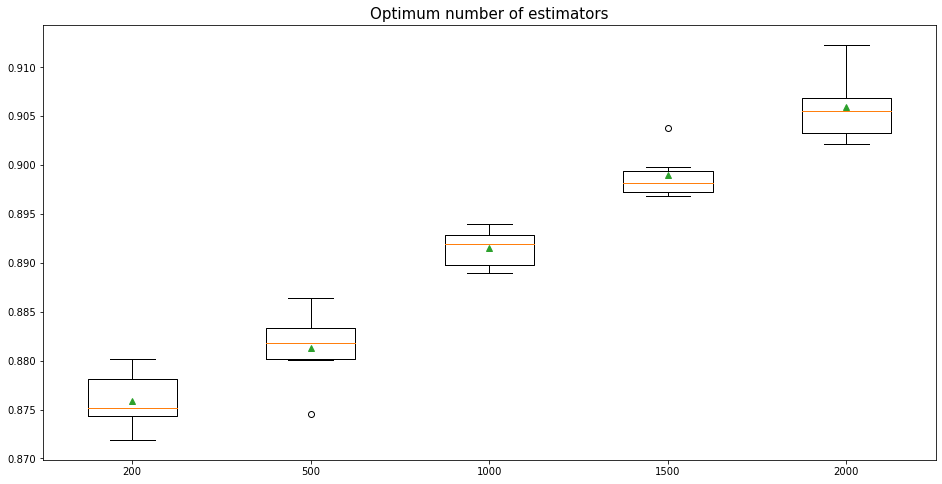

In [60]:
plt.figure(1, figsize=(16, 8))
ax = plt.boxplot(res.values(), labels=res.keys(), showmeans=True)
plt.title('Optimum number of estimators', size=15)

Ok, it looks like as we increase the number of estimators, we are increasing our weighted F1 score. So we will use 2000. We will use this to do another round of validation to find the optimum learning rate.

In [61]:
learn = {}
for i in [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]:
    model = AdaBoostClassifier(n_estimators=2000, learning_rate = i)

    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)
    learn [f'{i}'] = cross_val_score(model, X, y, scoring="f1_micro", cv=cv, n_jobs=-1)

In [62]:
learn

{'0.001': array([0.87356322, 0.86305419, 0.86990802, 0.872578  , 0.86436782,
        0.87122208]),
 '0.01': array([0.87192118, 0.87520525, 0.86990802, 0.87356322, 0.87323481,
        0.87023653]),
 '0.1': array([0.87553366, 0.87224959, 0.87155059, 0.87389163, 0.87454844,
        0.86760841]),
 '0.5': array([0.88407225, 0.8771757 , 0.88600526, 0.8863711 , 0.88440066,
        0.88731932]),
 '1': array([0.90213465, 0.9047619 , 0.90637319, 0.91231527, 0.90706076,
        0.90275953]),
 '1.5': array([0.94515599, 0.94318555, 0.94809461, 0.94679803, 0.93891626,
        0.93988173]),
 '2': array([0.67520525, 0.57438424, 0.42444152, 0.69129721, 0.69031199,
        0.69809461])}

Text(0.5, 1.0, 'Optimum learning rate')

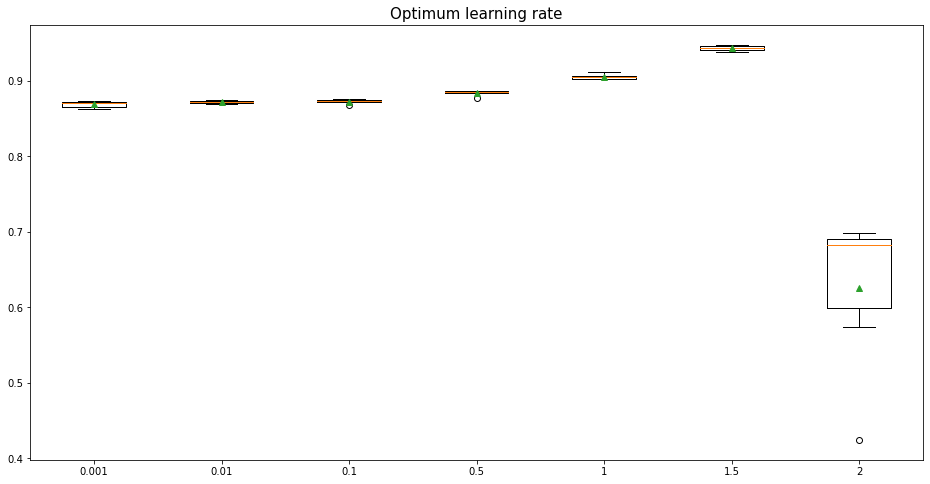

In [63]:
plt.figure(1, figsize=(16, 8))
ax = plt.boxplot(learn.values(), labels=learn.keys(), showmeans=True)
plt.title('Optimum learning rate', size=15)

Ok, so we can see there is a steady increase as the learning rate increases, it then plateaus at the 1.5 mark and drops significantly, so let's use 1.5 as our learning rate.

Now running Adaboost and Bagging Classifier with the optimised hyper parameters.

In [64]:
all_models = {'BC-DT':BC(clf, n_estimators = 200, random_state = 42, max_samples = 0.75),
              'ADA-DT': AdaBoostClassifier(clf, n_estimators=2000,learning_rate=1.5, random_state=42)}

ES_models = multiple_models(X_train, y_train, X_test, y_test)
ES_models

,Model Type,Accuracy - Train,Accuracy - Test,ROC_AUC - Train,ROC_AUC - Test,Recall - Train,Recall - Test,F1 - Train,F1 - Test,Precision - Train,Precision - Test,MCC - Train,MCC - Test
0,BC-DT,100.0,96.880131,100.0,90.533228,100.0,81.578947,100.0,88.391039,100.0,96.444444,100.0,87.008351
1,ADA-DT,100.0,92.391899,100.0,83.384470,100.0,70.676692,100.0,73.009709,100.0,75.502008,100.0,68.637836


In [65]:
Evaluation_df = [Evaluation_df ,ES_models]
Evaluation_df = pd.concat(Evaluation_df)
Evaluation_df = Evaluation_df.round(2)
Evaluation_df

,Model Type,Accuracy - Train,Accuracy - Test,ROC_AUC - Train,ROC_AUC - Test,Recall - Train,Recall - Test,F1 - Train,F1 - Test,Precision - Train,Precision - Test,MCC - Train,MCC - Test
0,SVC,90.42,87.19,93.97,90.63,98.94,95.49,74.66,68.46,59.94,53.36,72.49,65.30
1,KNN,96.56,94.85,97.68,95.12,99.23,95.49,89.18,84.39,80.97,75.60,87.80,82.15
2,DT,100.00,92.39,100.00,81.20,100.00,65.41,100.00,71.46,100.00,78.73,100.00,67.50
3,MLP,100.00,96.11,100.00,94.45,100.00,92.11,100.00,87.34,100.00,83.05,100.00,85.21
0,SVC_GS,99.96,97.87,99.98,97.50,100.00,96.99,99.86,92.97,99.71,89.27,99.83,91.83
1,KNN_GS,100.00,96.00,100.00,94.39,100.00,92.11,100.00,87.03,100.00,82.49,100.00,84.86
2,DT_GS,88.81,86.26,69.35,63.89,42.13,32.33,51.77,40.66,67.13,54.78,47.40,34.96
3,MLP_GS,100.00,97.32,100.00,98.12,100.00,99.25,100.00,91.51,100.00,84.89,100.00,90.31
0,BC-DT,100.00,96.88,100.00,90.53,100.00,81.58,100.00,88.39,100.00,96.44,100.00,87.01
1,ADA-DT,100.00,92.39,100.00,83.38,100.00,70.68,100.00,73.01,100.00,75.50,100.00,68.64


Training Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6265
           1       1.00      1.00      1.00      1042

    accuracy                           1.00      7307
   macro avg       1.00      1.00      1.00      7307
weighted avg       1.00      1.00      1.00      7307

Testing Results
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1602
           1       0.82      0.96      0.88       225

    accuracy                           0.97      1827
   macro avg       0.91      0.97      0.93      1827
weighted avg       0.97      0.97      0.97      1827



(None,
 None)

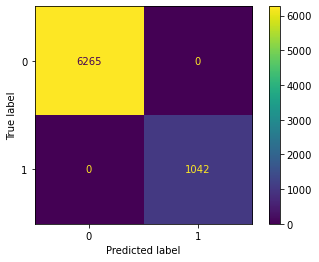

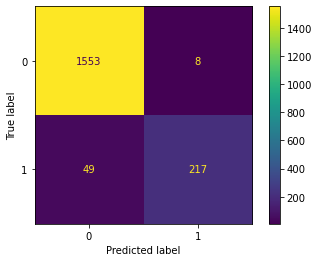

In [66]:
model = BC(clf, n_estimators = 200, random_state = 42, max_samples = 0.75)
model_train(X_train, y_train, X_test, y_test)  

model_test(X_train, y_train, X_test, y_test)  

Training Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6265
           1       1.00      1.00      1.00      1042

    accuracy                           1.00      7307
   macro avg       1.00      1.00      1.00      7307
weighted avg       1.00      1.00      1.00      7307

Testing Results
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1578
           1       0.71      0.76      0.73       249

    accuracy                           0.92      1827
   macro avg       0.83      0.85      0.84      1827
weighted avg       0.93      0.92      0.92      1827



(None,
 None)

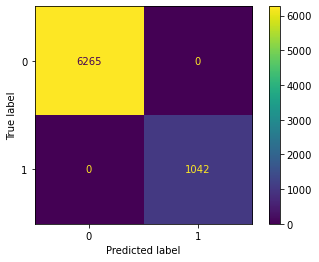

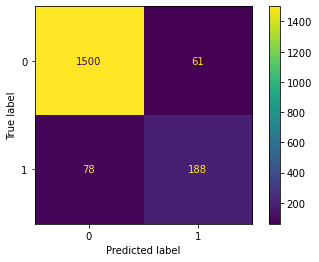

In [67]:
model = AdaBoostClassifier(clf, n_estimators=2000,learning_rate=1.5, random_state=42)
model_train(X_train, y_train, X_test, y_test)  

model_test(X_train, y_train, X_test, y_test)  

In [68]:
#Ensemble 3 - Stacking using mlxtend stacking classifier
from mlxtend.classifier import StackingClassifier

In [69]:
#stack using hypertune model parameters from question 5

model_1 = SVC(random_state=42, C = 10, gamma = 0.1, kernel = 'rbf')

model_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, max_features = 'auto', min_samples_leaf = 3, random_state=42, min_samples_split=6)

model_3 = KNeighborsClassifier(metric ='minkowski',n_neighbors = 10, p=1, weights = 'distance', leaf_size = 10 )

model_4 = MLPClassifier(activation = 'relu', hidden_layer_sizes = (200,), learning_rate = 'constant', random_state=42, solver='adam')

lr = LogisticRegression()

In [70]:

all_models = {'Stacking':StackingClassifier(classifiers = [model_1,model_2, model_3, model_4], meta_classifier = lr)}
ST_models = multiple_models(X_train, y_train, X_test, y_test)
ST_models

,Model Type,Accuracy - Train,Accuracy - Test,ROC_AUC - Train,ROC_AUC - Test,Recall - Train,Recall - Test,F1 - Train,F1 - Test,Precision - Train,Precision - Test,MCC - Train,MCC - Test
0,Stacking,100.0,97.755884,100.0,97.439226,100.0,96.992481,100.0,92.639138,100.0,88.659794,100.0,91.446641


Training Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6265
           1       1.00      1.00      1.00      1042

    accuracy                           1.00      7307
   macro avg       1.00      1.00      1.00      7307
weighted avg       1.00      1.00      1.00      7307

Testing Results
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1536
           1       0.97      0.89      0.93       291

    accuracy                           0.98      1827
   macro avg       0.97      0.94      0.96      1827
weighted avg       0.98      0.98      0.98      1827



(None,
 None)

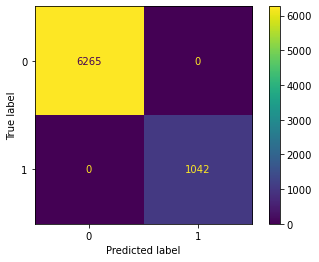

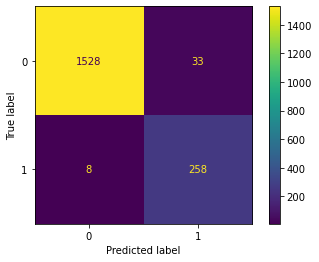

In [71]:
model = StackingClassifier(classifiers = [model_1,model_2, model_3, model_4], meta_classifier = lr)
model_train(X_train, y_train, X_test, y_test)  
model_test(X_train, y_train, X_test, y_test)

In [72]:
Evaluation_df = [Evaluation_df ,ST_models]
Evaluation_df = pd.concat(Evaluation_df)
Evaluation_df = Evaluation_df.round(2)
Evaluation_df

,Model Type,Accuracy - Train,Accuracy - Test,ROC_AUC - Train,ROC_AUC - Test,Recall - Train,Recall - Test,F1 - Train,F1 - Test,Precision - Train,Precision - Test,MCC - Train,MCC - Test
0,SVC,90.42,87.19,93.97,90.63,98.94,95.49,74.66,68.46,59.94,53.36,72.49,65.30
1,KNN,96.56,94.85,97.68,95.12,99.23,95.49,89.18,84.39,80.97,75.60,87.80,82.15
2,DT,100.00,92.39,100.00,81.20,100.00,65.41,100.00,71.46,100.00,78.73,100.00,67.50
3,MLP,100.00,96.11,100.00,94.45,100.00,92.11,100.00,87.34,100.00,83.05,100.00,85.21
0,SVC_GS,99.96,97.87,99.98,97.50,100.00,96.99,99.86,92.97,99.71,89.27,99.83,91.83
1,KNN_GS,100.00,96.00,100.00,94.39,100.00,92.11,100.00,87.03,100.00,82.49,100.00,84.86
2,DT_GS,88.81,86.26,69.35,63.89,42.13,32.33,51.77,40.66,67.13,54.78,47.40,34.96
3,MLP_GS,100.00,97.32,100.00,98.12,100.00,99.25,100.00,91.51,100.00,84.89,100.00,90.31
0,BC-DT,100.00,96.88,100.00,90.53,100.00,81.58,100.00,88.39,100.00,96.44,100.00,87.01
1,ADA-DT,100.00,92.39,100.00,83.38,100.00,70.68,100.00,73.01,100.00,75.50,100.00,68.64


### 6 e. Is it possible to build ensemble model using ML classifiers other than decision tree? If yes, then explain with an example.

In [73]:
#Ensemble Model 4: Voting Classifier
from sklearn.ensemble import VotingClassifier

In [74]:
estimator = []
estimator.append(('KNN', KNeighborsClassifier()))
estimator.append(('SVC', SVC()))
estimator.append(('MLP', MLPClassifier()))


In [75]:
all_models = {'Voting':VotingClassifier(estimators=estimator, voting='hard')}
VT_H_models = multiple_models(X_train, y_train, X_test, y_test)
VT_H_models

,Model Type,Accuracy - Train,Accuracy - Test,ROC_AUC - Train,ROC_AUC - Test,Recall - Train,Recall - Test,F1 - Train,F1 - Test,Precision - Train,Precision - Test,MCC - Train,MCC - Test
0,Voting,99.753661,97.318008,99.616322,94.220136,99.424184,89.849624,99.138756,90.702087,98.854962,91.570881,98.995589,89.140733


Training Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6259
           1       0.99      0.99      0.99      1048

    accuracy                           1.00      7307
   macro avg       1.00      0.99      0.99      7307
weighted avg       1.00      1.00      1.00      7307

Testing Results
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1563
           1       0.92      0.92      0.92       264

    accuracy                           0.98      1827
   macro avg       0.95      0.96      0.95      1827
weighted avg       0.98      0.98      0.98      1827



(None,
 None)

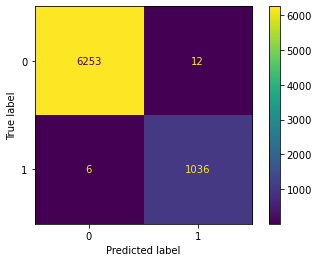

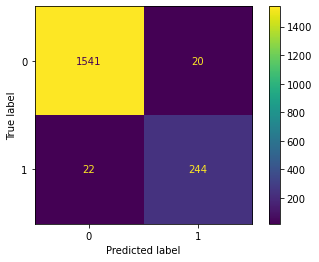

In [76]:
model = VotingClassifier(estimators=estimator, voting='hard')
model_train(X_train, y_train, X_test, y_test)  
model_test(X_train, y_train, X_test, y_test)

In [77]:
Evaluation_df = [Evaluation_df ,VT_H_models]
Evaluation_df = pd.concat(Evaluation_df)
Evaluation_df = Evaluation_df.round(2)
Evaluation_df


,Model Type,Accuracy - Train,Accuracy - Test,ROC_AUC - Train,ROC_AUC - Test,Recall - Train,Recall - Test,F1 - Train,F1 - Test,Precision - Train,Precision - Test,MCC - Train,MCC - Test
0,SVC,90.42,87.19,93.97,90.63,98.94,95.49,74.66,68.46,59.94,53.36,72.49,65.30
1,KNN,96.56,94.85,97.68,95.12,99.23,95.49,89.18,84.39,80.97,75.60,87.80,82.15
2,DT,100.00,92.39,100.00,81.20,100.00,65.41,100.00,71.46,100.00,78.73,100.00,67.50
3,MLP,100.00,96.11,100.00,94.45,100.00,92.11,100.00,87.34,100.00,83.05,100.00,85.21
0,SVC_GS,99.96,97.87,99.98,97.50,100.00,96.99,99.86,92.97,99.71,89.27,99.83,91.83
1,KNN_GS,100.00,96.00,100.00,94.39,100.00,92.11,100.00,87.03,100.00,82.49,100.00,84.86
2,DT_GS,88.81,86.26,69.35,63.89,42.13,32.33,51.77,40.66,67.13,54.78,47.40,34.96
3,MLP_GS,100.00,97.32,100.00,98.12,100.00,99.25,100.00,91.51,100.00,84.89,100.00,90.31
0,BC-DT,100.00,96.88,100.00,90.53,100.00,81.58,100.00,88.39,100.00,96.44,100.00,87.01
1,ADA-DT,100.00,92.39,100.00,83.38,100.00,70.68,100.00,73.01,100.00,75.50,100.00,68.64


In [78]:
Ensemble_df = [VT_H_models,ST_models,ES_models]
Ensemble_df = pd.concat(Ensemble_df)
Ensemble_df = Ensemble_df.round(2)
Ensemble_df

,Model Type,Accuracy - Train,Accuracy - Test,ROC_AUC - Train,ROC_AUC - Test,Recall - Train,Recall - Test,F1 - Train,F1 - Test,Precision - Train,Precision - Test,MCC - Train,MCC - Test
0,Voting,99.75,97.32,99.62,94.22,99.42,89.85,99.14,90.70,98.85,91.57,99.0,89.14
0,Stacking,100.00,97.76,100.00,97.44,100.00,96.99,100.00,92.64,100.00,88.66,100.0,91.45
0,BC-DT,100.00,96.88,100.00,90.53,100.00,81.58,100.00,88.39,100.00,96.44,100.0,87.01
1,ADA-DT,100.00,92.39,100.00,83.38,100.00,70.68,100.00,73.01,100.00,75.50,100.0,68.64


Ok now that we have combined the results of all models, we can compare them with each other.

In [79]:
Eval2 = [Ensemble_df, GS_models]
Eval2  = pd.concat(Eval2)
Eval2

,Model Type,Accuracy - Train,Accuracy - Test,ROC_AUC - Train,ROC_AUC - Test,Recall - Train,Recall - Test,F1 - Train,F1 - Test,Precision - Train,Precision - Test,MCC - Train,MCC - Test
0,Voting,99.750000,97.320000,99.620000,94.220000,99.420000,89.850000,99.140000,90.700000,98.850000,91.570000,99.000000,89.140000
0,Stacking,100.000000,97.760000,100.000000,97.440000,100.000000,96.990000,100.000000,92.640000,100.000000,88.660000,100.000000,91.450000
0,BC-DT,100.000000,96.880000,100.000000,90.530000,100.000000,81.580000,100.000000,88.390000,100.000000,96.440000,100.000000,87.010000
1,ADA-DT,100.000000,92.390000,100.000000,83.380000,100.000000,70.680000,100.000000,73.010000,100.000000,75.500000,100.000000,68.640000
0,SVC_GS,99.958943,97.865353,99.976057,97.503287,100.000000,96.992481,99.856253,92.972973,99.712919,89.273356,99.832445,91.826671
1,KNN_GS,100.000000,96.004379,100.000000,94.387033,100.000000,92.105263,100.000000,87.033748,100.000000,82.491582,100.000000,84.860276
2,DT_GS,88.805255,86.261631,69.349377,63.891230,42.130518,32.330827,51.768868,40.661939,67.125382,54.777070,47.401682,34.962696
3,MLP_GS,100.000000,97.318008,100.000000,98.118615,100.000000,99.248120,100.000000,91.507799,100.000000,84.887460,100.000000,90.314106


[Text(0.5, 1.0, 'Accuracy %')]

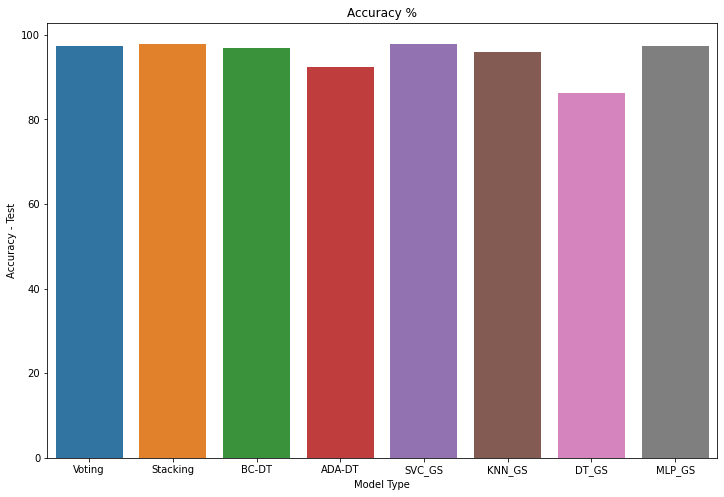

In [80]:
plt.figure(1, figsize=(12, 8))
sns.barplot(x="Model Type", y="Accuracy - Test",data=Eval2).set(title="Accuracy %")

[Text(0.5, 1.0, 'Recall %')]

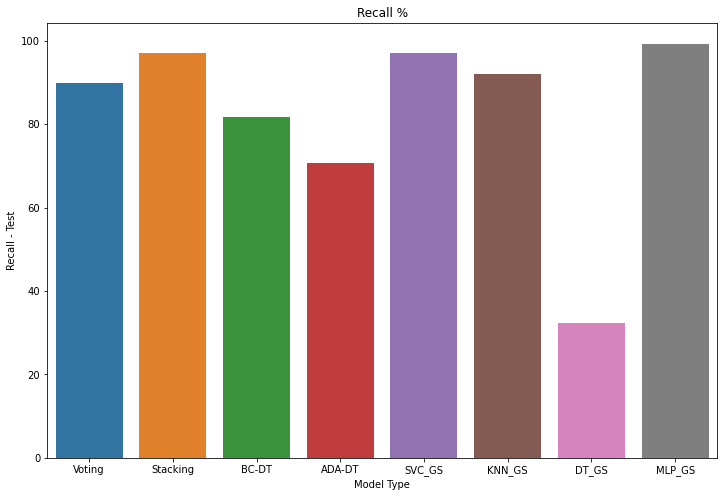

In [81]:
plt.figure(1, figsize=(12, 8))
sns.barplot(x="Model Type", y="Recall - Test",data=Eval2).set(title="Recall %")

[Text(0.5, 1.0, 'F1 %')]

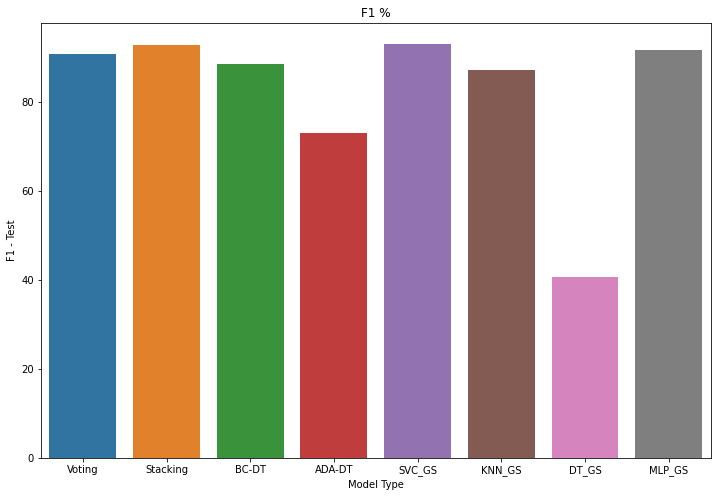

In [82]:
plt.figure(1, figsize=(12, 8))
sns.barplot(x="Model Type", y="F1 - Test",data=Eval2).set(title="F1 %")

[Text(0.5, 1.0, 'Precision %')]

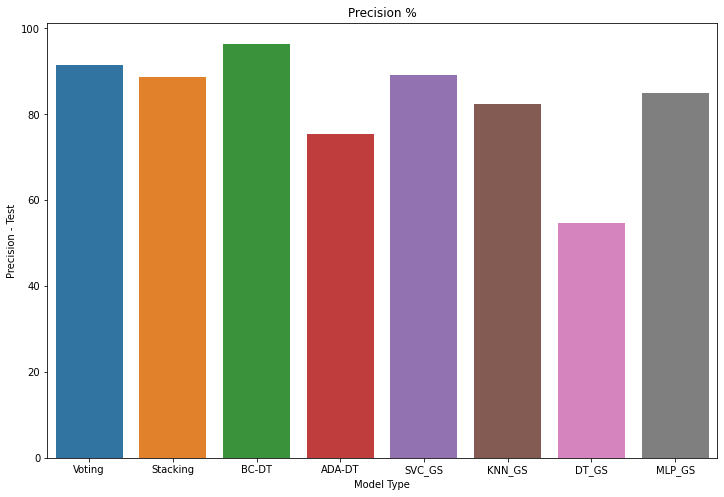

In [83]:
plt.figure(1, figsize=(12, 8))
sns.barplot(x="Model Type", y="Precision - Test",data=Eval2).set(title="Precision %")

[Text(0.5, 1.0, 'MCC %')]

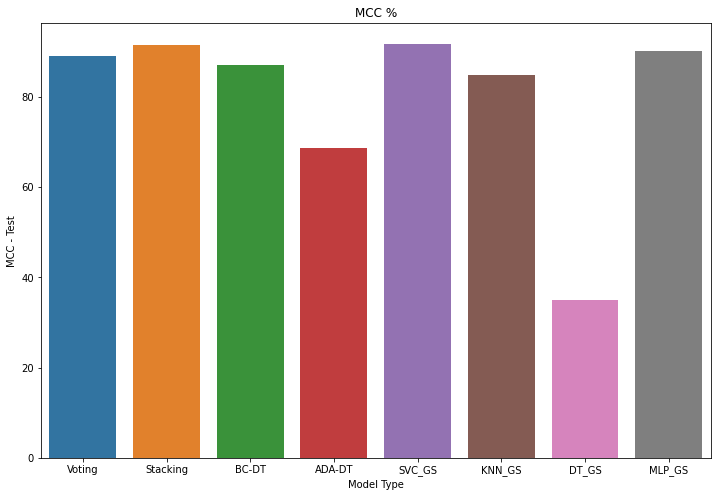

In [84]:
plt.figure(1, figsize=(12, 8))
sns.barplot(x="Model Type", y="MCC - Test",data=Eval2).set(title="MCC %")